# 1) ML Project - Air Pollution - Data Exploration - Viz - Linear Regression

<font color='blue'> Scripts by Kevin Jeswani, Junaid Zafar, & Laiba Shah 
<br>
WeCloudData Bootcamp 2022 (Part-time Cohort)<br> </font>

First we take a look at a dataset for air pollutions deaths due over time for different countries. We visualize data and develop the linear regression models on the regional and national level. The linear regression models are valuable at predicting the general trend in deaths due over time and be used to predict future deaths, where past data appears to be highly linear. It has severe limitations for many countries. Polynomial models could be explored. To explore the interaction with other features, we proceed to merge different datasets between death due to environmental factors and socio-demographic/economic factors. We then examine them in 3 tree-based machine learning models.

The set of scripts in the folder 'AirPollution_Scripts' are segmented for the purpose of clarity & convenience <br>
The following is the suggested order for running the scripts:
- 'MLProject_AirPollution_Viz_LR.ipynb' **This Script** - loading the initial Kaggle air pollution deaths dataset, processing, visualizing the base dataset, linear regression examination and future predictions.
- 'MLProject_DataProcessing_OECD_WB_GBD.ipynb' - loading raw data from world bank and GBD/OECD datasets, cleaning, and merging usable data. We test the use of fuzzy data set merging.
- 'MLProject_Exploratory_ML_Models.ipynb' - loading the cleaning & merged dataset, testing out KNN regressor, and model selection with PyCaret, and discussion of models/insights in modelling data.
- 'MLProject_ML_Models_refined.ipynb' - development of selected machine learning models (Extra Trees, Random Forest, XGBoost), cross-validation, & Ensemble methods; discussion of model results

The aim is to explore the intial dataset (https://www.kaggle.com/datasets/akshat0giri/death-due-to-air-pollution-19902017?resource=download), supplement it, infer trends, and make predictions on future deaths due to environmental factors. 
The data is then supplement with:
- Global Burden of Disease Study 2019 Results via OECD.stats: https://stats.oecd.org/index.aspx?lang=en# (where the Kaggle dataset seems to have extracted and cleaned data from)
- World Bank Development Indicators: https://databank.worldbank.org/source/world-development-indicators#
<br>

# 1.0 Importing Essential Libraries <a class="anchor" id="1.0_Libraries"></a>

In [2]:
#Data Processing
import pandas as pd
import numpy as np

#Plotting
import matplotlib as mpl #Matplot lib
import matplotlib.pyplot as plt #pyplot
from matplotlib.lines import Line2D
import plotly.express as px #plotly express
import plotly.io as pio
import kaleido #sub-library required for saving plotly
import seaborn as sns #seabprm
sns.set() 

In [50]:
from icecream import ic #debugging tool

In [51]:
# Insert your local root folder links here
root = r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts'
root_raw=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Raw Data'
root_proc=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Processed'
root_plots=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Plots'
# Kaggle dataset - deaths due to air pollution 1990-2017
fid='\death-rates-from-air-pollution.csv'

## 2.0 Exploratory Data Analysis <a class="anchor" id="2.0_EDA"></a>

### 2.1 Load Data & Examine Contents <a class="anchor" id="2.1_LoadContents"></a>

In [52]:
df = pd.read_csv(root_raw+fid) #load the data to pandas
df #display first 5 and last 5

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922
...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173


In [53]:
#statistics of 3 dependent variables (deaths + 1 summation) & 1 independent variable (year)
df.describe()

,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,87.804083,50.481504,35.114982,3.370793
std,8.078372,57.845436,58.722565,18.207369,4.325445
min,1990.000000,8.401696,0.003859,7.542899,0.000000
25%,1996.750000,41.016114,2.002779,21.955108,1.302905
50%,2003.500000,72.653557,23.737851,30.977196,2.338684
75%,2010.250000,127.607177,90.138777,44.604181,3.515409
max,2017.000000,318.463253,293.509187,132.815726,37.356034


In [54]:
#Check for null values in the dataset
df.isnull().sum()

Entity                                               0
Code                                               980
Year                                                 0
Air pollution (total) (deaths per 100,000)           0
Indoor air pollution (deaths per 100,000)            0
Outdoor particulate matter (deaths per 100,000)      0
Outdoor ozone pollution (deaths per 100,000)         0
dtype: int64

In [55]:
#Codes are country codes - Entities that are groupings/aggregates of countries do not have a code
df['Code'].nunique()

196

In [56]:
#total number of unique entities
df['Entity'].nunique()

231

In [57]:
#Get the unique entities without Codes
entity_groups=list(df[df['Code'].isnull()]['Entity'].unique())
entity_groups
#= in general Groupings of countries/continents/sub-continents

['Andean Latin America',
 'Australasia',
 'Caribbean',
 'Central Asia',
 'Central Europe',
 'Central Europe, Eastern Europe, and Central Asia',
 'Central Latin America',
 'Central Sub-Saharan Africa',
 'East Asia',
 'Eastern Europe',
 'Eastern Sub-Saharan Africa',
 'England',
 'High SDI',
 'High-income',
 'High-income Asia Pacific',
 'High-middle SDI',
 'Latin America and Caribbean',
 'Low SDI',
 'Low-middle SDI',
 'Middle SDI',
 'North Africa and Middle East',
 'North America',
 'Northern Ireland',
 'Oceania',
 'Scotland',
 'South Asia',
 'Southeast Asia',
 'Southeast Asia, East Asia, and Oceania',
 'Southern Latin America',
 'Southern Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Tropical Latin America',
 'Wales',
 'Western Europe',
 'Western Sub-Saharan Africa']

### 2.2 Data Cleaning <a class="anchor" id="2.2_DataCleaning"></a>

In [58]:
#Check that total death due to pollution equals the summation of the 3 inidividual categories
df['totalsError']=df['Air pollution (total) (deaths per 100,000)']-\
                            df['Indoor air pollution (deaths per 100,000)']-\
                            df['Outdoor particulate matter (deaths per 100,000)']-\
                            df['Outdoor ozone pollution (deaths per 100,000)']
df[df['totalsError']!=0]['totalsError'].describe()

count    6.449000e+03
mean    -1.166623e+00
std      1.877950e+00
min     -1.526814e+01
25%     -1.175276e+00
50%     -5.995065e-01
75%     -2.914178e-01
max      2.842171e-14
Name: totalsError, dtype: float64

In [59]:
df

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",totalsError
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442,-2.948632
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960,-2.934959
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822,-2.936410
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266,-2.952733
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922,-2.987504
...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,143.850145,113.456097,27.589603,4.426291,-1.621846
6464,Zimbabwe,ZWE,2014,138.200536,108.703566,26.760618,4.296971,-1.560618
6465,Zimbabwe,ZWE,2015,132.752553,104.340506,25.715415,4.200907,-1.504274
6466,Zimbabwe,ZWE,2016,128.692138,100.392287,25.643570,4.117173,-1.460892


6499 entries have a mean error of 1.166 deaths per 100k <br> 
This may be an error or may be a fourth category that does not fall under the the Indoor/OutdoorPM2.5,
or ozone pollution <br>
**We will ignore this for now** <br>

In [60]:
#Dropping the Code column - not useful since we already used it to determine aggregate entities
df.drop('Code', axis=1, inplace=True)

In [61]:
#Making sure that all years meet the same number of times equal to the number of countries
len(df['Entity'].unique())

231

In [62]:
for uniqe_year in df['Year'].unique():
    print((df[df['Year']==uniqe_year].count()), uniqe_year)

Entity                                             231
Year                                               231
Air pollution (total) (deaths per 100,000)         231
Indoor air pollution (deaths per 100,000)          231
Outdoor particulate matter (deaths per 100,000)    231
Outdoor ozone pollution (deaths per 100,000)       231
totalsError                                        231
dtype: int64 1990
Entity                                             231
Year                                               231
Air pollution (total) (deaths per 100,000)         231
Indoor air pollution (deaths per 100,000)          231
Outdoor particulate matter (deaths per 100,000)    231
Outdoor ozone pollution (deaths per 100,000)       231
totalsError                                        231
dtype: int64 1991
Entity                                             231
Year                                               231
Air pollution (total) (deaths per 100,000)         231
Indoor air pollution (deaths 

In [63]:
#Drop Contituents of the UK - Other datasets that we may want to integrate only have United Kingdom
df.drop(df[(df['Entity']=='England') |
           (df['Entity']=='Northern Ireland') |
          (df['Entity']=='Wales') |
          (df['Entity']=='Scotland')].index,inplace=True)

In [64]:
#Separate out countries, regions, & economic/sustainability aggregates
regions =['Andean Latin America','Australasia', 'Caribbean', 'Central Asia', 'Central Europe',
          'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 'Central Sub-Saharan Africa',
          'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa','Latin America and Caribbean',
          'North Africa and Middle East','North America','Oceania', 'South Asia','Southeast Asia',
          'Southeast Asia, East Asia, and Oceania','Southern Latin America','Southern Sub-Saharan Africa',
          'Sub-Saharan Africa','Tropical Latin America','Western Europe','Western Sub-Saharan Africa','World']
#Repeat with SDI (Socio-demographic index categorization) & income
SDIs=['High SDI','High-middle SDI', 'Middle SDI','Low-middle SDI','Low SDI']
income=['High-income','High-income Asia Pacific']

In [65]:
#Data frame of countries only
df_countries=df

In [66]:
#Regional Analysis
df_regions=df_countries[df_countries['Entity'].isin(regions)]
#Repeat with SDIs and Income
df_SDIs=df_countries[df_countries['Entity'].isin(SDIs)]
df_income=df_countries[df_countries['Entity'].isin(income)]

In [67]:
#Remove the region, SDIs, and income groupings from the base df_countries
df_countries.drop(df_countries[df_countries['Entity'].isin(regions+income+SDIs)].index,inplace=True)
df_countries

,Entity,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)",totalsError
0,Afghanistan,1990,299.477309,250.362910,46.446589,5.616442,-2.948632
1,Afghanistan,1991,291.277967,242.575125,46.033841,5.603960,-2.934959
2,Afghanistan,1992,278.963056,232.043878,44.243766,5.611822,-2.936410
3,Afghanistan,1993,278.790815,231.648134,44.440148,5.655266,-2.952733
4,Afghanistan,1994,287.162923,238.837177,45.594328,5.718922,-2.987504
...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,143.850145,113.456097,27.589603,4.426291,-1.621846
6464,Zimbabwe,2014,138.200536,108.703566,26.760618,4.296971,-1.560618
6465,Zimbabwe,2015,132.752553,104.340506,25.715415,4.200907,-1.504274
6466,Zimbabwe,2016,128.692138,100.392287,25.643570,4.117173,-1.460892


In [68]:
#Save cleaned set to csv by grouping
fid='\AirPollutionDeaths_Countries.csv' #Countries
df_countries.to_csv(root_proc+fid)
fid='AirPollutionDeaths_Regions.csv' #Regions
df_regions.to_csv(root_proc+fid)
fid='AirPollutionDeaths_SDI.csv' #SDI (Socio-demographic index)
df_SDIs.to_csv(root_proc+fid)
fid='AirPollutionDeaths_income.csv' #Income
df_income.to_csv(root_proc+fid)

## 3.0 Data visualization <a class="anchor" id="3.0_DataViz"></a>

### 3.1 Correlation Heat Map - Countries & Aggregates <a class="anchor" id="3.1_CorelationHeatmap"></a>

C:\Users\kevin\AppData\Local\Temp\ipykernel_2084\1554309744.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



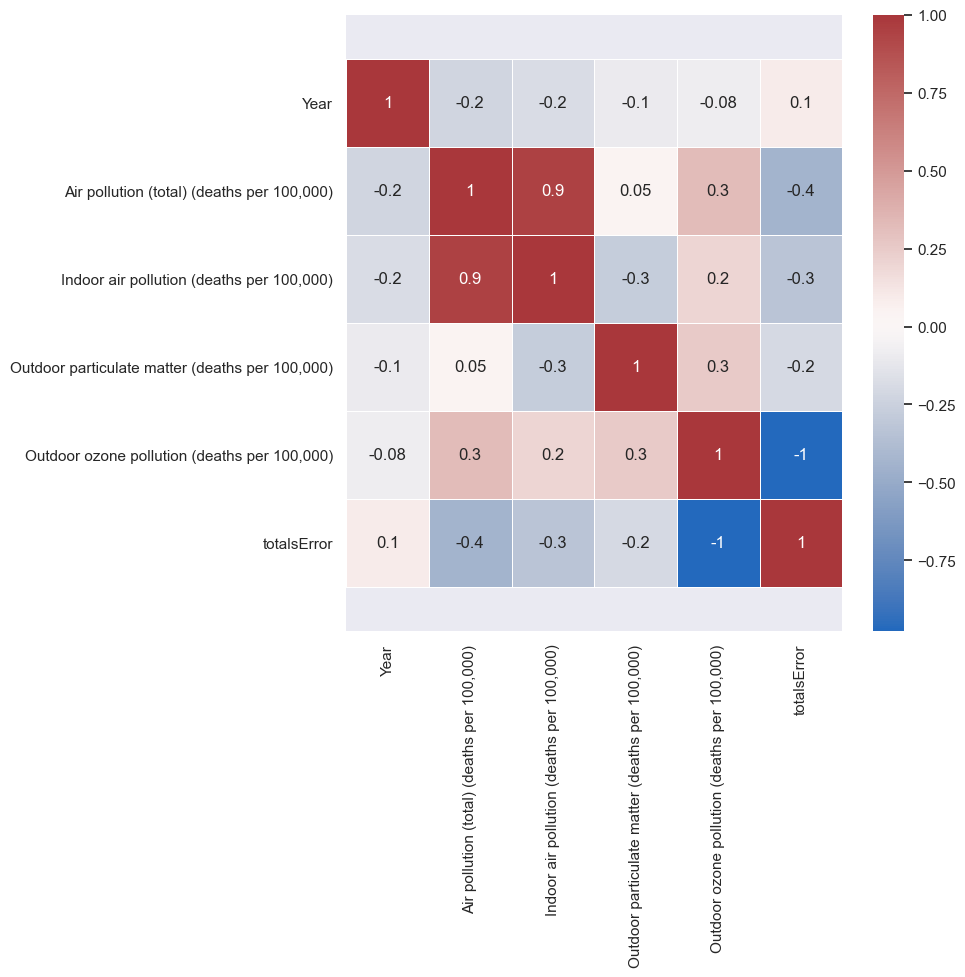

In [69]:
#plot correlation heatmap, store containers fig and ax
fig, ax = plt.subplots(figsize = (8,8))
#Heatmap with seaborn
sns.heatmap(df.corr(), fmt='.1g', annot = True, ax=ax,linewidths=.5,cmap="vlag")
#get and reset the limits
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Save fig
fid='\AirPollutionDeaths_Kaggle_CorrelationHeatmap.png'
plt.savefig(root_plots+fid, format='png', dpi=600,bbox_inches='tight')

Correlation between deaths and Indoor populaion is 0.9 which indicates that most deaths are due to indoor pollution

### 3.2 Lineplot (Trend) - Countries & Aggregates - Central Tendency & 95% Confidence Interval <a class="anchor" id="3.2_LinePlot_all"></a>

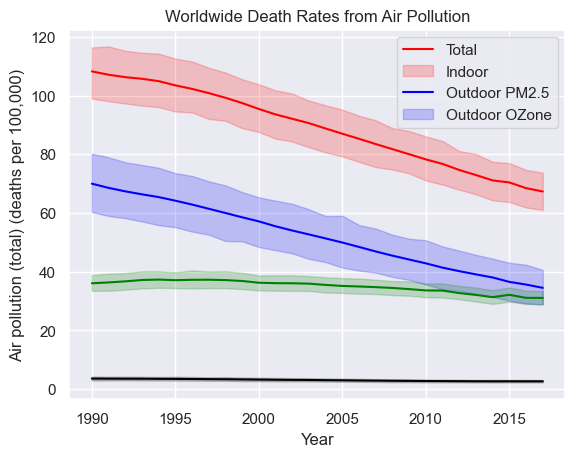

<Figure size 640x480 with 0 Axes>

In [23]:
#Seaborn to plot 3 deaths types + total deaths for each country, taking central tendency & 95% CI of all countries 
fig = sns.lineplot(x="Year", y="Air pollution (total) (deaths per 100,000)", data=df,color = 'red')
fig = sns.lineplot(x="Year", y="Indoor air pollution (deaths per 100,000)", data=df, color='blue')
fig = sns.lineplot(x="Year", y="Outdoor particulate matter (deaths per 100,000)", data=df,color='green')
fig = sns.lineplot(x="Year", y="Outdoor ozone pollution (deaths per 100,000)", data=df,color='black')
#Set the title & legend
plt.title("Worldwide Death Rates from Air Pollution")
plt.legend(labels=['Total','Indoor',
                  'Outdoor PM2.5',
                  'Outdoor OZone'],loc='upper right')
plt.show()
#Save plot
fid = "Air Pollution Mortality - Lineplot - Countries & Aggregate.png"
plt.savefig(root_plots+fid, format='png', dpi=600,bbox_inches='tight')

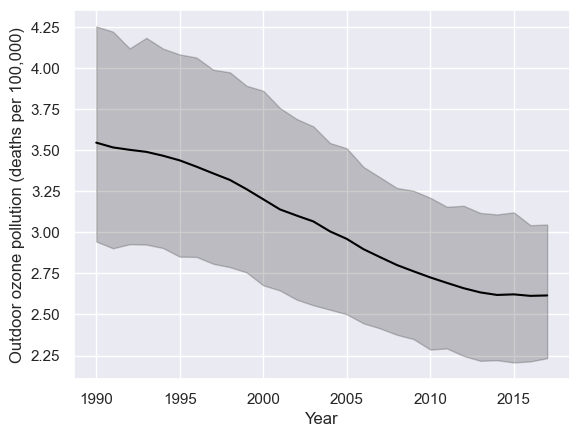

In [24]:
#Taking a closer look at Global OZone Deaths - lineplot with seaborn
fig = sns.lineplot(x="Year", y="Outdoor ozone pollution (deaths per 100,000)", data=df,color='black')

Overall deaths due to air pollution is decreaing (Both Outdoors and Indoors) <br>
Visual inspection - Indoor pollution (due to combustion of solid fuels) has the most impact on total mortality due to air pollution, contributing roughly between 0.6 and 0.5 of total deaths<br>
Additionally outdoor particulate matter (PM2.5) air pollution and ozone appear to be fairly stagnant and both series have fairly low variability <br>
Outdoor particulate matter (PM2.5) mortality seems to contribute roughly between 0.3 to 0.5 of total deaths <br>
**NOTE** The line plots above with the central tendency and 95% confidence intervals can be misleading, there is actually much more scatter in the data as explain in the following sections

### 3.3 Geo-HeatMap (Choropleth) - Countries - 1990 vs. 2017 <a class="anchor" id="3.3_GeoHeatMap></a>

In [25]:
# visualize the situation in the first and last years
#Isolate total air pollution deaths for each country and plot 1990 and 2017 values
df_1990 = df_countries[df_countries['Year']==1990]
df_1990 = df_1990.reset_index() #reset the index 
df_2017 = df_countries[df_countries['Year']==2017]
df_2017 = df_2017.reset_index()

In [26]:
# Plot choroplet with plotly express - colors representing the value scale
temp_df = pd.DataFrame(df_1990['Air pollution (total) (deaths per 100,000)']) #temp df for processing
# set the choropleth fig
fig = px.choropleth(temp_df, locations=df_1990['Entity'],
                    color=temp_df['Air pollution (total) (deaths per 100,000)'],
                    hover_data=['Air pollution (total) (deaths per 100,000)'],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
# Create continuous color scale, locations of colors set to the country names
# set the actual color value to the values in the temp df
# set the geo locations
fig.update_geos(fitbounds="locations", visible=False)
# Add the titl
fig.update_layout(title_text="Heat Map - Total Air Pollution Deaths in 1990")
# Reset the cholor scheme and title
fig.update_coloraxes(colorbar_title="Mortality (per 100,000)",colorscale="reds")
fig.show()
# Save fig
fid="Heat Map - Total Air Pollution Deaths in 1990.png"
pio.write_image(fig,root_plots+fid)

In [27]:
# Isolate total air pollution deaths for each country and plot 1990 and 2017 values
# Repeated steps for 1990's choroplet plot - see above
temp_df = pd.DataFrame(df_2017['Air pollution (total) (deaths per 100,000)'])
fig = px.choropleth(temp_df, locations=df_2017['Entity'],
                    color=temp_df['Air pollution (total) (deaths per 100,000)'],
                    hover_data=['Air pollution (total) (deaths per 100,000)'],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Heat Map - Total Air Pollution Deaths in 2017")
fig.update_coloraxes(colorbar_title="Mortality (per 100,000)",colorscale="blues")
fig.show()
pio.write_image(fig,"Heat Map - Total Air Pollution Deaths in 2017.png")

In [28]:
# Get the total delta between air pollution deaths in each country
df_dif_1990_and_2017 = pd.DataFrame(df_2017['Air pollution (total) (deaths per 100,000)'] - df_1990['Air pollution (total) (deaths per 100,000)'])
df_dif_1990_and_2017.rename(columns={'Air pollution (total) (deaths per 100,000)' : 'Air pollution (total) (deaths per 100,000)_dif'}, inplace=True)
df_dif_1990_and_2017['Entity'] = df_2017['Entity']

In [29]:
# Visualize the difference in the situation in the first and last years
# Isolate total air pollution deaths for each country and plot 1990 and 2017 values
temp_df = pd.DataFrame(df_dif_1990_and_2017['Air pollution (total) (deaths per 100,000)_dif'])
# Set the color value based on custom vector
color_val=temp_df.copy()
# Rename the column
color_val=color_val.rename({'Air pollution (total) (deaths per 100,000)_dif':'colorVal'},axis=1)
# Skew the countries with increase in air pollution deaths to highlight them
color_val.loc[color_val['colorVal']>0,
              'colorVal'] *=10

In [30]:
# Plot the heatmap with custom color value using divering color scheme so 0 delta in deaths per 100,000 is a neutral color
fig = px.choropleth(temp_df, locations=df_dif_1990_and_2017['Entity'],
                    color=color_val['colorVal'],
                    hover_data=['Air pollution (total) (deaths per 100,000)_dif'],
                    color_continuous_scale=px.colors.diverging.RdYlGn[::-1],locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Heat Map - Difference in Total Air Pollution Deaths in Year 1990 & 2017")
fig.update_coloraxes(colorbar_title="Mortality (per 100,000)")#,colorscale=[(0,"red"),(0.02,"yellow"),(0.95,"green")]
fig.show()
pio.write_image(fig,"Heat Map - Difference in Total Air Pollution Deaths in Year 1990 & 2017.png")

We can see Libray, Lesotho, and Uzekistan had an increase in total deaths due to air pollution (per 100,000) <br>
China, Myanmar, Thailand, Afghanistan, and Angola apear to have made the most progress in decreasing deaths per 100,000 (absolute value)

### 3.4 Bar Plots - Examining Countries with Highest & Lowest All-Time Deaths   <a class="anchor" id="3.4_BarPlots"></a>

In [31]:
#Aggregate the total nmber of deaths due to pollution (per 100,000) between 1990-2017
df_g = df_countries.groupby('Entity', as_index=False).aggregate('sum') 
df_g = df_g.sort_values('Air pollution (total) (deaths per 100,000)') #sort the values

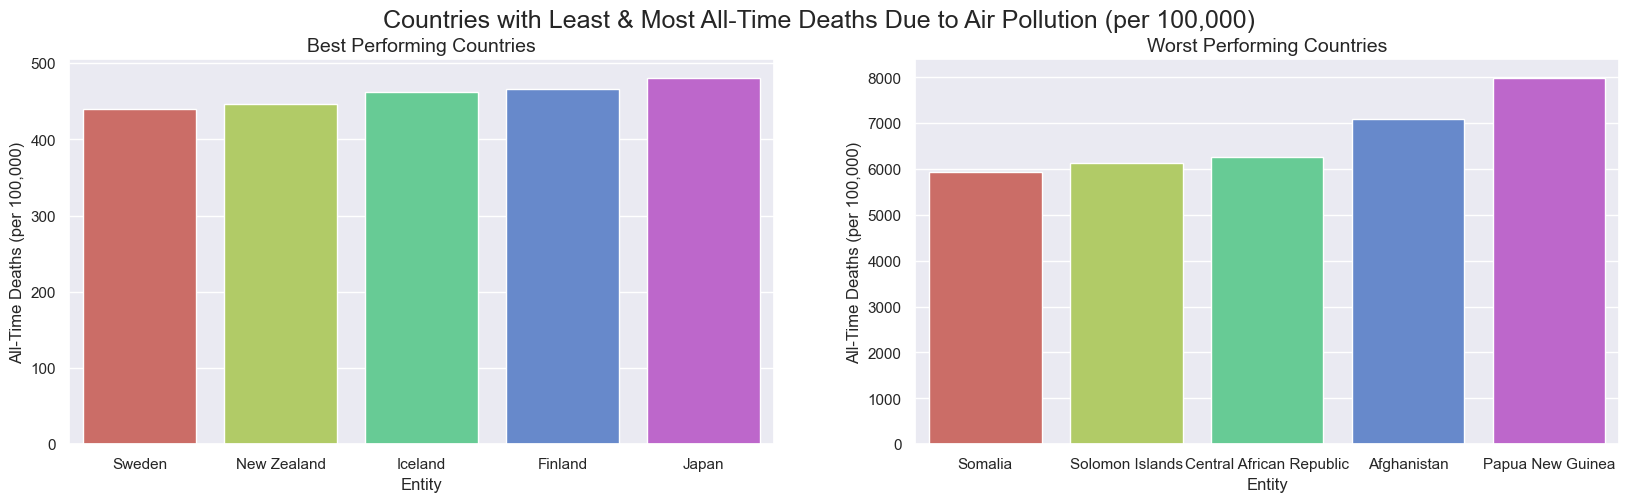

In [32]:
# Generate two bar sub-plots - lowest all-time deaths (per 100,000) due to air pollution vs. hightest
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,5))
# setup seaborn barplots
sns.barplot(x='Entity' ,y="Air pollution (total) (deaths per 100,000)", ax=ax1, data=df_g.head(),palette="hls")
sns.barplot(x='Entity', y="Air pollution (total) (deaths per 100,000)", ax=ax2, data=df_g.tail(),palette="hls")
# Set ylabels, title, and figure title
ax1.set_ylabel("All-Time Deaths (per 100,000)")
ax2.set_ylabel("All-Time Deaths (per 100,000)")
ax1.set_title("Best Performing Countries",fontsize=14)
ax2.set_title("Worst Performing Countries",fontsize=14)
fig.suptitle("Countries with Least & Most All-Time Deaths Due to Air Pollution (per 100,000)",fontsize=18)
# Save fig
fid="\Air Pollution Mortality - BarPlot - Best & Worst Performance.png"
fig.savefig(root_plots+fid, format='png', dpi=600,bbox_inches='tight')

In examining the all-time deaths (summation of deaths per 100,000 for all years per entity), we can see that highly developed nations (Sweden, New Zealand, Iceland, Findland, and Japan) perform the best. Not only do these countries have socialized medicine but also stringent air pollution policies. In contrast, war-torn/empoverished countries or small-island nations have deaths about 10x (per 100,000) as large as the best performing countries.

## 4.0 Linear Regression  <a class="anchor" id="4.0_LinearRegression"></a>

To develop a linear regression model for air pollution deaths, we would need to model the 3 sources of air pollution deaths separately then combine them for the total number of death. <br>
We would then check the total number of air pollution deaths, but for this we would need to correct the total deaths as the summation of the 3 air pollution types in the base dataset

### 4.1 Imports & Setup <a class="anchor" id="4.1_Imports"></a>

In [231]:
# Machine Learning-specific - Linear Regression
from sklearn.linear_model import LinearRegression #main model
from sklearn.preprocessing import PolynomialFeatures #for polynomial regression
from sklearn.model_selection import train_test_split #for data spliting
from sklearn.metrics import mean_squared_error, r2_score #for metrics evaluation
import statsmodels.api as sm #stats model required for certain cal

# Random - for sampling
import random

In [34]:
#Correcting the total number of air pollution deaths
pd.options.mode.chained_assignment = None #Ignore settingwithcopy 
df_countries['Corrected Total Deaths (per 100,000)']=df_countries['Air pollution (total) (deaths per 100,000)']-\
                                                    df_countries['totalsError']
df_regions['Corrected Total Deaths (per 100,000)']=df_regions['Air pollution (total) (deaths per 100,000)']-\
                                                    df_regions['totalsError']
df_income['Corrected Total Deaths (per 100,000)']=df_income['Air pollution (total) (deaths per 100,000)']-\
                                                    df_income['totalsError']
df_SDIs['Corrected Total Deaths (per 100,000)']=df_SDIs['Air pollution (total) (deaths per 100,000)']-\
                                                    df_SDIs['totalsError']

We will now look at developing individual linear regression models for different regions or economic groups. 

#### 4.2 Functions & General Parameters

In [35]:
# List of death indicators we are studying
indicators=['Indoor air pollution (deaths per 100,000)','Outdoor particulate matter (deaths per 100,000)',
            'Outdoor ozone pollution (deaths per 100,000)']
# Simplify the list of variables/indicators for processing many models at one
LR_titles=['Indoor_Slopes','Indoor_Intercepts','Indoor_Scores',
                    'OutdoorPM2.5_Slopes','OutdoorPM2.5_Intercepts','OutdoorPM2.5_Scores',
                   'OutdoorOZ_Slopes','OutdoorOZ_Intercepts','OutdoorOZ_Scores']
# Labels for predicted death values columns
Pred_titles=['Entity','Year','Indoor_Actual','Indoor_Predicted','OutdoorPM2.5_Actual','OutdoorPM2.5_Predicted',
             'OutdoorOZ_Actual','OutdoorOZ_Predicted','Total_Actual','Total_Predicted']

In [36]:
# Initialize dictionaries for storing linear regresion predictions and parameters
LR_parameters=dict()
LR_predictions=dict()
poly_parameters=dict()
poly_predictions=dict()

In [37]:
# Create function for polynomial regression
def poly_reg(X,y,X_forecast,degree):
    """Polynomial regression
    Args:
        X: independent variable (dates, int list)
        y: dependent variable, indicator (float list)
        X_forecast: independent variable for prediction (int list)
        degree : degree of polynomial (ex. 3=cubic) (int)
    Returns:
        model: fitted polynomial reg.; poly = polynomial features
        poly: polynomial parameters
    """
    # Reshape X, y in necessary
    if type(X) != np.ndarray:
        X = np.array(X).reshape(-1,1)
    if type(y) != np.ndarray:
        y = np.array(y).reshape(-1,1)
    if type(X_forecast) != np.ndarray:
        X_forecast = np.array(X_forecast).reshape(-1,1)       
    # Initialize polynomial feature matrix with polynomial features combos given input X
    poly = PolynomialFeatures(degree=degree)
    # Fit & Transform input X
    X_poly = poly.fit_transform(X)
    # Initialize linear regression model
    model = LinearRegression()
    # Fit model with polynomial input X_poly
    model.fit(X_poly, y)
    # Predict
    X_pred = np.concatenate((X,X_forecast),axis=0) #pass two arrays as tuple and add rows (concat vertically)
    y_pred = model.predict(poly.fit_transform(X_pred))
    # Return fitted model and polynomial features
    return model, poly, y_pred,X_pred

In [87]:
# Create a function to develop multiple regression models for multiple indicator series and multiple entities 
def LR_multiple(label, df_in,entities,series,LR_labels,Pred_labels,X_forecast,degree=0):
    '''Create linear (& optional polynomial) regression models for multiple time series results are stored
    Input:
        label = target group label for analysis (used to index the dictionary of result
        entities = list of names for the indicator series (i.e., entity)
        df_in = data frame used for the model data, time series data for len(indicators) with a column for the 'Year'
        LR_labels = list of titles for the LR parameters to be exported, size= len(series)*3, 
            for slopes, intercepts, and scores of each series being predicted
        Pred_labels = list of titles for the actual and predicted series value arrays, size = len(series)*2+1
        degree = polynomial degree; no polynomial model trained if =0
        X_forecast: independent variable for prediction (int list)
    Returns: 
        LR_parameters_out = dictionary where LR parameters are to be stored
        LR_predictions out = dictionary where LR death prediction arrays are to be stored   
        poly_predictions_out = dictionary where LR death prediction arrays are to be stored   
    '''
    # Initialize df using empty arrays for regression values
    LR_parameters_out = pd.DataFrame(np.random.randint(1, size=(len(entities),9)), columns=LR_labels)
    poly_parameters_out = pd.DataFrame(np.random.randint(1, size=(len(entities),3)), columns=[LR_labels[2],LR_labels[5],LR_labels[8]])
    # Total unique entitites
    ng = len(entities)
    # Initialize df using empty arrays for predicted values
    LR_predictions_out  = pd.DataFrame(np.random.randint(1, size=(len(df_in)+len(X_forecast)*ng,8+2)),
                                   columns=Pred_labels)
    poly_predictions_out = pd.DataFrame(np.random.randint(1, size=(len(df_in)+len(X_forecast)*ng,8+2)),
                                   columns=Pred_labels)
    
    # Add the a column for the entity grouping and the entities for each row, and set as index
    LR_parameters_out.insert(0,'Entity',entities)
    LR_parameters_out=LR_parameters_out.set_index('Entity')
    poly_parameters_out.insert(0,'Entity',entities)
    poly_parameters_out=poly_parameters_out.set_index('Entity')

    # TRAIN LINEAR REGRESSION MODELS OF INPUT SERIES
    # OPTIONAL: train polynomial model with input degree
    # initialize counters
    r=0
    j=0
    # independent var forecast range
    X_forecast = np.array(X_forecast).reshape(-1,1)
    for g in entities: #analysis by region
        # independent var = year for the current group
        X = df_in[df_in['Entity'] == g].loc[:,'Year'].values.reshape(-1,1)
        X_pred = np.concatenate((X,X_forecast),axis=0) #X_train + X_forecast
        # store the region and year
        LR_predictions_out.iloc[j:(j+len(X_pred)),0]=g
        LR_predictions_out.iloc[j:(j+len(X_pred)),1]=X_pred
        poly_predictions_out.iloc[j:(j+len(X_pred)),0]=g
        poly_predictions_out.iloc[j:(j+len(X_pred)),1]=X_pred
        # Initialize vars and counters
        c=0
        k=2
        y_tot=[]
        y_pred_tot=[]
        # Iterate through each time series
        for ind,i in enumerate(series):
            # dependent var = deaths per air pollution type
            y = df_in[df_in['Entity'] == g].loc[:,i].values.reshape(-1,1)
            if ind == 0:
                y_tot=y #first series, set 
            else:
                y_tot = np.add(y_tot, y) 
            # Store the actual y
            LR_predictions_out.iloc[j:(j+len(X)),k]=y
            poly_predictions_out.iloc[j:(j+len(X)),k]=y
            # Initialize, fit & Predict linear regression model
            LR_model = LinearRegression() 
            LR_model.fit(X, y)  
            y_pred=LR_model.predict(X_pred)
            if ind == 0:
                y_pred_tot = y_pred
            else:  # Get summation of time series per group (total deaths)
                y_pred_tot = np.add(y_pred_tot, y_pred) 
            # Optional polynomial regression
            if degree !=0:
                poly_model, poly, y_pred_poly,X_pred = poly_reg(X,y,X_forecast,degree=degree)
                if ind == 0:
                    y_pred_tot_poly = y_pred_poly
                else: # Get summation of time series per group (total deaths)
                    y_pred_tot_poly = np.add(y_pred_tot_poly, y_pred_poly) 
            # Store the predictions
            LR_predictions_out.iloc[j:(j+len(X_pred)),k+1]=y_pred
            poly_predictions_out.iloc[j:(j+len(X_pred)),k+1]=y_pred_poly
            # Collect slope, intercepts, scores per time series
            slope=round(LR_model.coef_[0][0], 3)
            LR_parameters_out.iat[r,c]=slope
            intercept=round(LR_model.intercept_[0], 3)
            LR_parameters_out.iat[r,1+c]=intercept
            score=(round(LR_model.score(X, y), 2))
            LR_parameters_out.iat[r,2+c]=score
            # Scores only for polynomial
            poly_score = (round(r2_score(y, y_pred_poly[:len(y)]), 2))
            poly_parameters_out.iat[r,int((k-1)/2)]=poly_score
            #update column counters for predictions & parameters df
            k+=2
            c+=3

        # Store the summation of series predictions (total deaths)
        LR_predictions_out.iloc[j:(j+len(X_pred)),-1]=y_pred_tot
        LR_predictions_out.iloc[j:(j+len(X)),-2]=y_tot
        # Optional polynomial regression
        if degree !=0:
            poly_predictions_out.iloc[j:(j+len(X)),-2]=y_tot
            poly_predictions_out.iloc[j:(j+len(X_pred)),-1]=y_pred_tot_poly
        # Update row counters for predictions & parameters df
        j+=len(X_pred)
        r+=1
    # Return linear prediction and parameters
    return LR_parameters_out,LR_predictions_out, poly_parameters_out, poly_predictions_out

In [ ]:
# Function for batch plotting linear regressions
def plot_LR_multiple(label,df_in,entities,Pred_labels,root,title_add,legend_adjust=0,forecast_len=0,figheight=14):
    '''Create plots linear regression model results and entities for multiple time series results are stored
    Input:
        label = target group label for analysis (used to index the dictionary of result
        entities = list of names for the indicator series (i.e., entity)
        df_in = data frame of predicted series values
        Pred_labels = list of series titles for the LR parameters to be plotted
        root = directory for saving the figure
        title_add = additional identifier to add to title
        forecast_len = number of years to forecast
        figheight = height of the figure (override)
    Returns: 
        figure
    '''
    #Set figure; num of subplots will be produced in rows of 3 columns
    fig, axs = plt.subplots(nrows=int(round(len(entities)/3,0)),ncols= 3,figsize=(20,figheight))
    #set the color and linestyle for the series
    colorscheme=['blue','blue','green','green','black','black','red','red']
    linescheme=['-','--','-','--','-','--','-','--']
    #Loop over each entity, access their series, plot on individual subplots denoted by ax_i
    for entity, ax_i in zip(entities,axs.ravel()):
        #loop over each series
        legendline=[]
        for s in range(len(Pred_labels)):
            if s < len(Pred_labels)-2:
                x=df_in[df_in['Entity']==entity]['Year']
                y=df_in[df_in['Entity']==entity][Pred_labels[s+2]]
                if s%2==0: #if actual time series (not pred)
                    x=x[0:len(x)-forecast_len]
                    y=y[0:len(y)-forecast_len]
                # Plot current series
                sns.lineplot(x=x,y=y,ax=ax_i,color = colorscheme[s],
                             linestyle=linescheme[s],legend='full')#
                #create dummy lines to force legend to have correct properties
                legendline.append(Line2D(xdata=df_in[df_in['Entity']==entity]['Year'], 
                                     ydata=df_in[df_in['Entity']==entity][Pred_labels[s+2]],
                                     color = colorscheme[s],label=Pred_labels[s+2],linestyle=linescheme[s])) 
        #Set the title and ylabel, and set floor for y-axis
        ax_i.set_title(entity,fontsize=14)
        ax_i.set_ylabel("Deaths (per 100,000) by "+label)
        ax_i.set_ylim(bottom=0)
    #shift the legend down and outside the subplots then flatten horizontally
    labels=Pred_labels[2:len(Pred_labels)+1]
    ax_i.legend(handles=legendline, loc='lower left', bbox_to_anchor=(-2.5+legend_adjust, -0.3),ncol=8)
    #add figure title and adjust inter-plot spacing
    fig.suptitle("Linear Regression of Air Pollution Deaths "+title_add,fontsize=18)
    fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.3)
    #save fig
    fig.savefig(root, format='png', dpi=600,bbox_inches='tight')

### 4.3 Linear Regression by Air Pollution Type: REGIONAL  <a class="anchor" id="4.3_RegionalLR"></a>

In [195]:
# Run and store for the current group
# REGIONAL
grouplabel='Regions' #tag for this analysis for data to be stored in the dictionaries
# Foreca    st dates
X_forecast = [2017,2018,2019,2021,2022,2023,2024,2025]
LR_parameters[grouplabel], LR_predictions[grouplabel], poly_parameters[grouplabel], poly_predictions[grouplabel] = \
                                    LR_multiple(grouplabel,df_regions,regions,indicators,LR_titles,Pred_titles,X_forecast,degree=3)


In [40]:
pd.set_option('display.max_rows', 15)
LR_parameters[grouplabel]

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Andean Latin America,-1.653,3340.396,0.95,-0.044,113.302,0.04,-0.013,27.830,0.98
Australasia,-0.019,37.385,0.86,-0.607,1232.697,0.99,0.008,-16.460,0.49
Caribbean,-0.735,1498.995,0.96,-0.241,513.793,0.90,-0.001,3.859,0.03
Central Asia,-1.405,2856.932,0.94,0.204,-351.265,0.19,-0.092,188.978,0.92
Central Europe,-0.844,1706.520,0.96,-0.739,1522.370,0.98,-0.036,74.906,0.84
...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,-2.030,4170.911,0.95,-0.085,198.261,0.34,-0.019,41.217,0.97
Tropical Latin America,-1.391,2807.093,0.94,-0.205,437.139,0.82,-0.061,123.958,0.93
Western Europe,-0.070,141.803,0.88,-0.660,1344.531,0.99,-0.025,52.468,0.97


In [41]:
poly_parameters['Regions']

,Indoor_Scores,OutdoorPM2.5_Scores,OutdoorOZ_Scores
Entity,,,
Andean Latin America,1.0,0.78,0.98
Australasia,1.0,0.99,1.00
Caribbean,1.0,0.95,0.88
Central Asia,1.0,0.85,0.97
Central Europe,1.0,0.99,0.99
...,...,...,...
Sub-Saharan Africa,1.0,0.82,0.99
Tropical Latin America,1.0,0.90,0.99
Western Europe,1.0,1.00,0.99


In [42]:
# Average Linear r2 regression Score for the Series
print('Mean of Indoor Air Pollution r2 Regression Scores is',round(LR_parameters[grouplabel]['Indoor_Scores'].mean(),3))
print('Mean of Outdoor Particulate Matter r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(),3))
print('Mean of Outdoor OZone r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorOZ_Scores'].mean(),3))

Mean of Indoor Air Pollution r2 Regression Scores is 0.932
Mean of Outdoor Particulate Matter r2 Regression Scores is 0.617
Mean of Outdoor OZone r2 Regression Scores is 0.768


In [43]:
# Average Cubic r2 regression Score for the Series
print('Mean of Indoor Air Pollution Cubic r2 Regression Scores is',round(poly_parameters[grouplabel]['Indoor_Scores'].mean(),3))
print('Mean of Outdoor Particulate Matter Cubic r2 Regression Scores is',round(poly_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(),3))
print('Mean of Outdoor OZone Cubic r2 Regression Scores is',round(poly_parameters[grouplabel]['OutdoorOZ_Scores'].mean(),3))

Mean of Indoor Air Pollution Cubic r2 Regression Scores is 0.996
Mean of Outdoor Particulate Matter Cubic r2 Regression Scores is 0.918
Mean of Outdoor OZone Cubic r2 Regression Scores is 0.966


The cubic functions have a better fit for the time series, especially the outdoor PM2 and OZone series.

In [44]:
# Determine which regions increasing pollution deaths per 100,000 with a positive slope
# This is indicator of overall trend for the date range, however it does not necessarily indicate whether recent years are experiencing a decline
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorOZ_Slopes']>0)]

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Australasia,-0.019,37.385,0.86,-0.607,1232.697,0.99,0.008,-16.460,0.49
Central Asia,-1.405,2856.932,0.94,0.204,-351.265,0.19,-0.092,188.978,0.92
Central Sub-Saharan Africa,-2.223,4589.954,0.92,-0.027,83.672,0.03,0.009,-11.426,0.87
North America,-0.007,14.493,0.97,-0.499,1021.381,0.96,0.021,-38.912,0.63
Oceania,-1.655,3513.410,0.92,0.225,-423.169,0.63,0.010,-19.117,0.35
South Asia,-3.130,6363.783,0.99,0.539,-1020.474,0.93,-0.299,617.434,0.91
Southeast Asia,-1.975,4016.418,0.99,0.225,-420.836,0.74,-0.027,57.871,0.90
Southern Latin America,-0.479,967.675,0.98,-0.205,440.624,0.64,0.028,-54.770,0.98
Southern Sub-Saharan Africa,-0.796,1641.095,0.44,0.470,-896.254,0.39,-0.013,29.363,0.06


In [45]:
# Determine which regions have the poorest linear regression model performance
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.2)]

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Andean Latin America,-1.653,3340.396,0.95,-0.044,113.302,0.04,-0.013,27.830,0.98
Caribbean,-0.735,1498.995,0.96,-0.241,513.793,0.90,-0.001,3.859,0.03
Central Asia,-1.405,2856.932,0.94,0.204,-351.265,0.19,-0.092,188.978,0.92
Central Sub-Saharan Africa,-2.223,4589.954,0.92,-0.027,83.672,0.03,0.009,-11.426,0.87
"Southeast Asia, East Asia, and Oceania",-3.095,6255.703,0.97,-0.110,270.428,0.17,-0.768,1556.348,0.98
Southern Sub-Saharan Africa,-0.796,1641.095,0.44,0.470,-896.254,0.39,-0.013,29.363,0.06


We can see that most regions have a good regression score above 0.9 and downward linear trend (-ve slope).
Outdoor particulate matter has the most scatter with OZone regressions only a slightly better fit ON AVERAGE for the regions. The polynomial (cubic) regression addresses this issue. <br>
<Br>
We can determine which regions increasing pollution deaths per 100,000 with a positive slope. <br>

Deaths due to indoor pollution has a decreasing trend for every region. <br>
Deaths due to outdoor PM2.5 has a decreasing trend for every region except Oceania, South Asia, Southeast Asia, South Sub-Saharan Africa, and Central Asia. <br>
Deaths due to Outdoor OZone pollution has a decreasing trend for every region, except Australasia, Central Sub-Saharan Africa, North America, Oceania, and Southern Latin America. Australasia, Central Sub-Saharan, amd Oceania slopes however are relatively flat, hinting at a constant or cyclical trend.

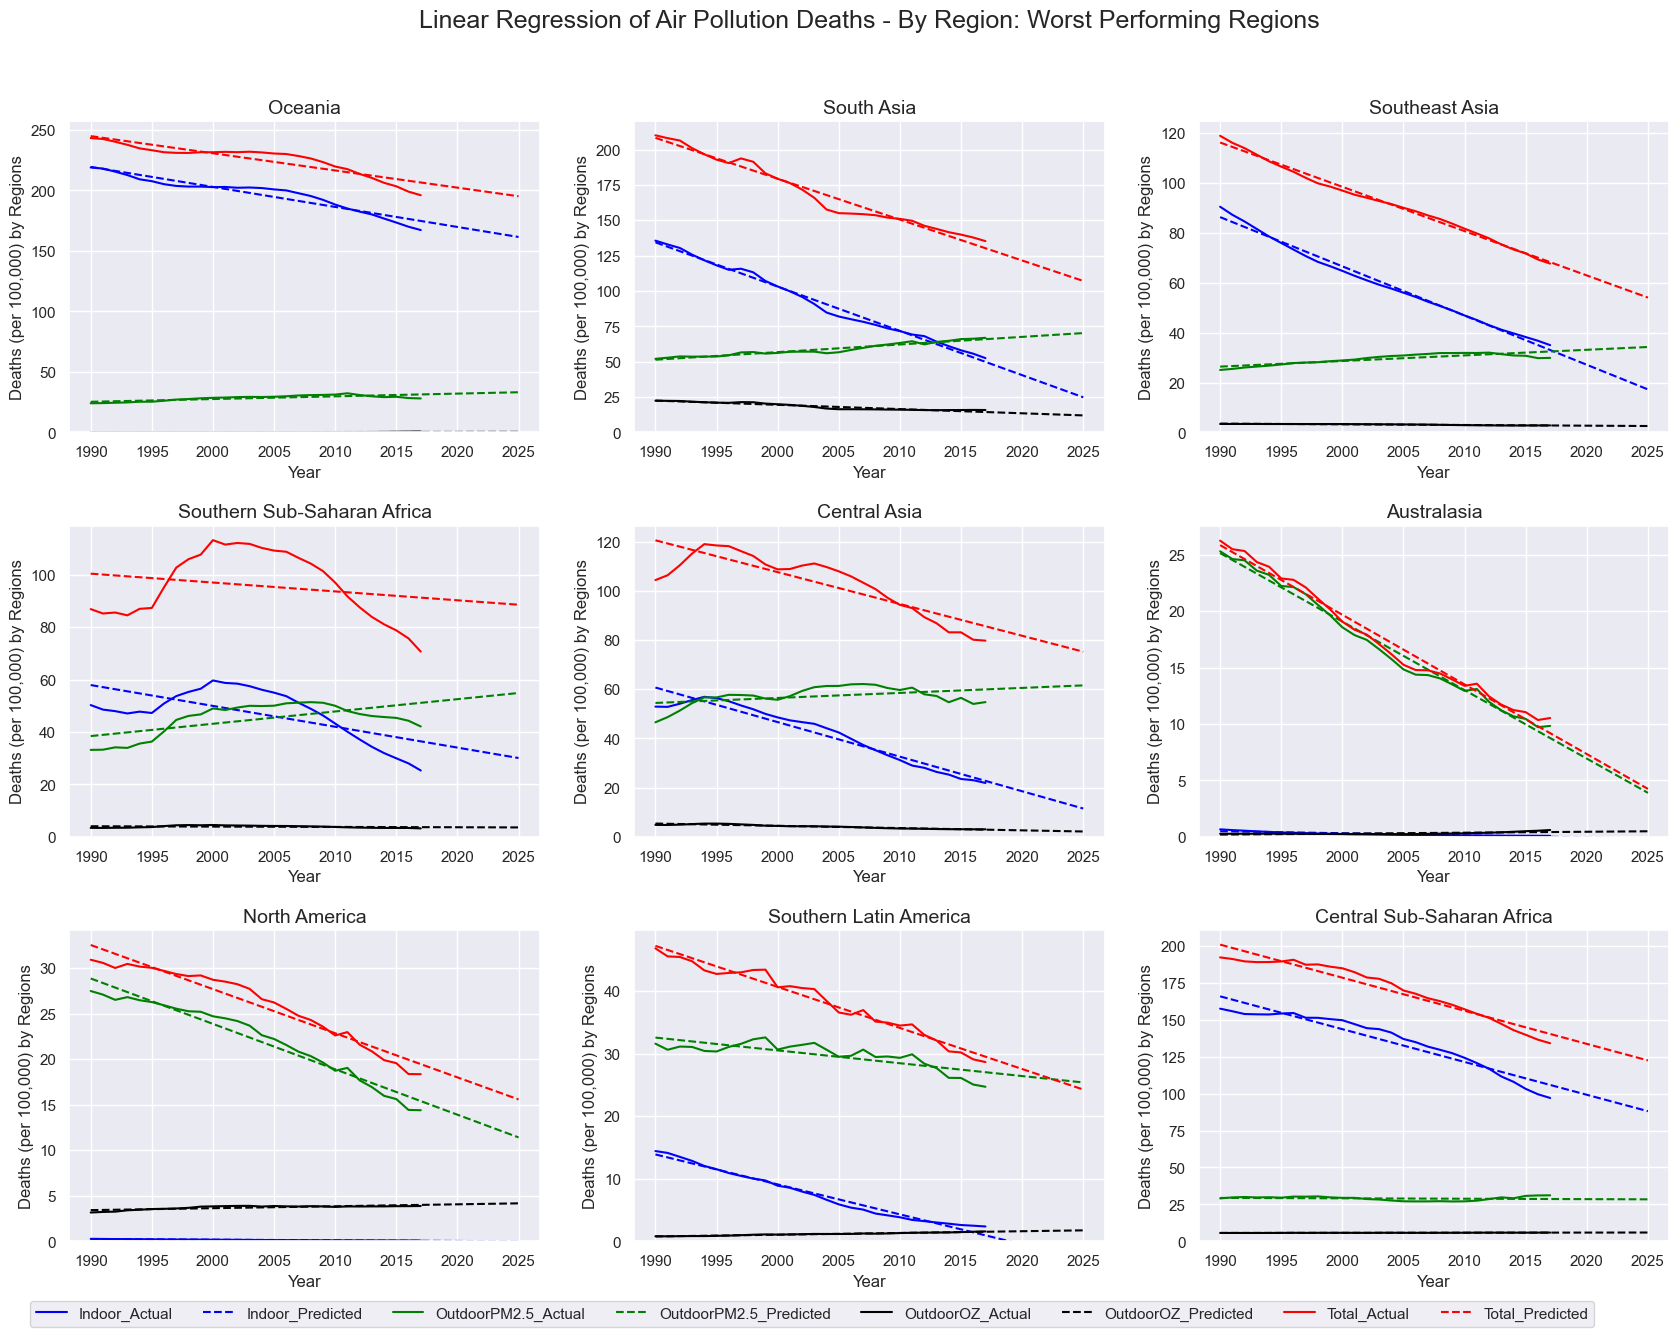

In [198]:
# Plot the worst performing regions (at least one death indicator having positive slope or limited change)
entities = ['Oceania','South Asia','Southeast Asia','Southern Sub-Saharan Africa',
            'Central Asia','Australasia','North America','Southern Latin America','Central Sub-Saharan Africa']
fid="Air Pollution Mortality - BarPlot - Worst Performance.png"
title_add="- By Region: Worst Performing Regions"
legend_adjust=0
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,
                legend_adjust,forecast_len=len(X_forecast))

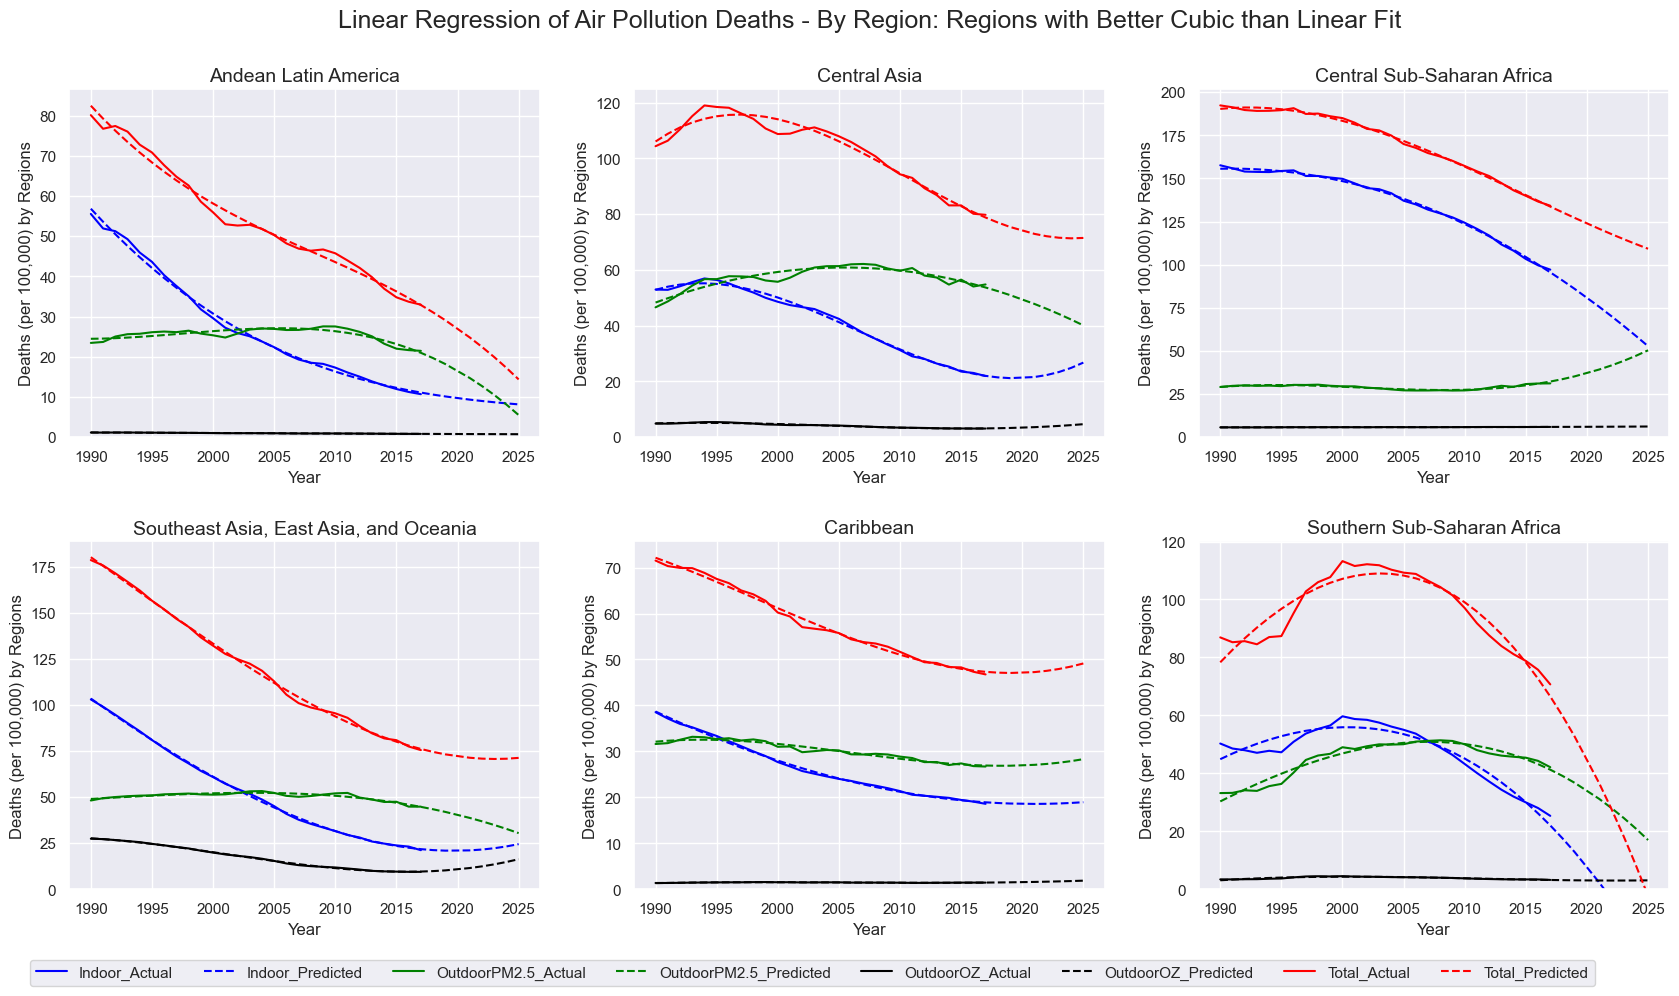

In [199]:
# Examine regions with poor linear regression performance = more appropraite cubic fit
entities = ['Andean Latin America','Central Asia','Central Sub-Saharan Africa','Southeast Asia, East Asia, and Oceania',
            'Caribbean','Southern Sub-Saharan Africa']
fid="Air Pollution Mortality - BarPlot - Regions with Better Cubic Fit.png"
title_add="- By Region: Regions with Better Cubic than Linear Fit"
legend_adjust=0
plot_LR_multiple(grouplabel,poly_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,
    legend_adjust,forecast_len=len(X_forecast),figheight=10)

When cubic regression is used, most regional & air pollution type time series appear to eventually decline when forecasted or plateau. The except to this is Central Asia which has a predicted indoor pollution increase after 2017. This is likely an inappropriate trend, as this entire analysis has pointed out a ovewhelming majority of entities have declines in indoor air pollution deaths.

### 4.4 Linear Regression by Air Pollution Type: SDI (Income Class) <a class="anchor" id="4.3_RegionalLR"></a>

We will now look at developing individual linear regression models for each SDI category

In [200]:
# Run and store for the current group
# REGIONAL
grouplabel='SDIs' #tag for this analysis for data to be stored in the dictionaries
LR_parameters[grouplabel], LR_predictions[grouplabel],poly_parameters[grouplabel], poly_predictions[grouplabel] = \
                                    LR_multiple(grouplabel,df_SDIs,SDIs,indicators,LR_titles,Pred_titles,X_forecast,degree=3)

In [201]:
#pd.set_option('display.max_rows', 10)
LR_parameters[grouplabel]

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
High SDI,-0.089,178.904,0.89,-0.609,1243.216,1.00,-0.025,53.736,0.97
High-middle SDI,-1.410,2846.108,0.97,-0.547,1149.919,0.75,-0.413,836.301,0.97
Middle SDI,-2.394,4841.346,0.98,0.068,-90.126,0.12,-0.399,810.601,0.98
Low-middle SDI,-2.753,5600.687,1.00,0.275,-504.262,0.94,-0.202,416.859,0.94
Low SDI,-2.918,5968.206,1.00,0.257,-465.843,0.54,-0.215,447.029,0.87


In [202]:
# Average r2 regression Score for the Series
print('Mean of Indoor Air Pollution r2 Regression Scores is',round(LR_parameters[grouplabel]['Indoor_Scores'].mean(),3))
print('Mean of Outdoor Particulate Matter r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(),3))
print('Mean of Outdoor OZone r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorOZ_Scores'].mean(),3))

Mean of Indoor Air Pollution r2 Regression Scores is 0.968
Mean of Outdoor Particulate Matter r2 Regression Scores is 0.67
Mean of Outdoor OZone r2 Regression Scores is 0.946


In [203]:
# Average r2 regression Score for the Series
print('Mean of Indoor Air Pollution r2 Regression Scores is',round(poly_parameters[grouplabel]['Indoor_Scores'].mean(),3))
print('Mean of Outdoor Particulate Matter r2 Regression Scores is',round(poly_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(),3))
print('Mean of Outdoor OZone r2 Regression Scores is',round(poly_parameters[grouplabel]['OutdoorOZ_Scores'].mean(),3))

Mean of Indoor Air Pollution r2 Regression Scores is 1.0
Mean of Outdoor Particulate Matter r2 Regression Scores is 0.932
Mean of Outdoor OZone r2 Regression Scores is 0.99


In [204]:
# Determine which regions increasing pollution deaths per 100,000 with a positive slope
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorOZ_Slopes']>0)]

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Middle SDI,-2.394,4841.346,0.98,0.068,-90.126,0.12,-0.399,810.601,0.98
Low-middle SDI,-2.753,5600.687,1.00,0.275,-504.262,0.94,-0.202,416.859,0.94
Low SDI,-2.918,5968.206,1.00,0.257,-465.843,0.54,-0.215,447.029,0.87


It appears that while indoor air pollution and outdoor OZone deaths are decreasing, Outdoor PM2.5 deaths appear to be increasing for the 3 lowest sustainable development indicator categories. The models for PM2.5 and OZone deaths are very strongly linear with regression score average >0.94, while the model predicting PM2.5 deaths has a poor performance of 0.67.

In [205]:
# Determine which regions have the poorest regression model performance
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.2)]

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Middle SDI,-2.394,4841.346,0.98,0.068,-90.126,0.12,-0.399,810.601,0.98


In [158]:
# Check that cubic fit addresses all of the poor performing linear fits
poly_parameters[grouplabel][(poly_parameters[grouplabel]['Indoor_Scores']<0.2) |
             (poly_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.2) |
             (poly_parameters[grouplabel]['OutdoorOZ_Scores']<0.2)]

,Indoor_Scores,OutdoorPM2.5_Scores,OutdoorOZ_Scores
Entity,,,


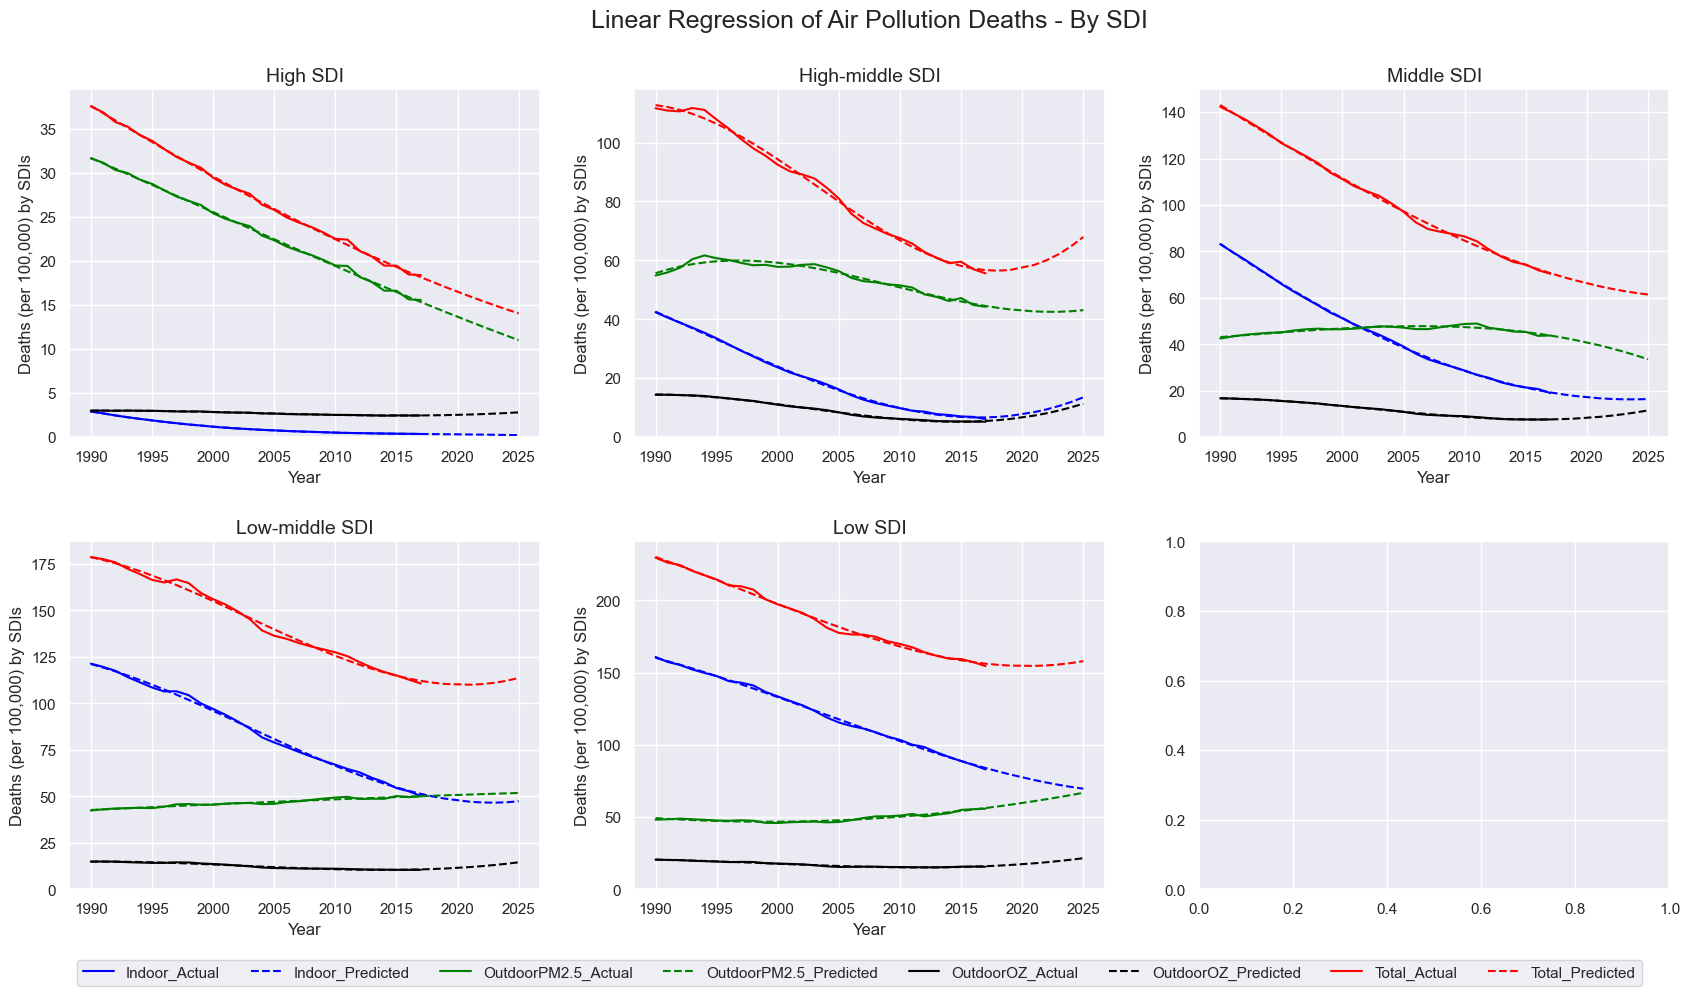

In [206]:
# Plot all SDIs - Cubic Fit
entities = SDIs
fid="Air Pollution Mortality - BarPlot - SDI all.png"
title_add="- By SDI"
legend_adjust=1.3
plot_LR_multiple(grouplabel,poly_predictions[grouplabel],entities,Pred_titles,root_plots+fid, \
                    title_add,legend_adjust,forecast_len=len(X_forecast),figheight=10)

Due to the nature of the cubic functions, an uptick in air pollution deaths is forecast for certain series however, this appears improbable for the High-Middle SDI. 

### 4.5 Linear Regression by Air Pollution Type: NATIONAL  <a class="anchor" id="4.3_RegionalLR"></a>

Finally we will develop individual regression models for each country, which can be more useful in modelling air pollution deaths into future

In [207]:
# Run and store for the current group
# NATIONAL LEVEL
countries=list(df_countries['Entity'].unique())
grouplabel='Countries' #tag for this analysis for data to be stored in the dictionaries
LR_parameters[grouplabel], LR_predictions[grouplabel], poly_parameters[grouplabel], poly_predictions[grouplabel]= \
                                    LR_multiple(grouplabel,df_countries,countries,indicators,LR_titles,
                                    Pred_titles,X_forecast=X_forecast,degree=3)

In [208]:
# Average R2 regression Score for the Series
print('Indoor Mean (std) R2: %.3f (%.3f)' % (LR_parameters[grouplabel]['Indoor_Scores'].mean(), LR_parameters[grouplabel]['Indoor_Scores'].std()) )
print('Outdoor PM2.5 Mean (std) R2: %.3f (%.3f)' % (LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(), LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].std()) )
print('Outdoor OZone Mean (std) R2: %.3f (%.3f)' % (LR_parameters[grouplabel]['OutdoorOZ_Scores'].mean(), LR_parameters[grouplabel]['OutdoorOZ_Scores'].std()) )

Indoor Mean (std) R2: 0.889 (0.151)
Outdoor PM2.5 Mean (std) R2: 0.612 (0.344)
Outdoor OZone Mean (std) R2: 0.665 (0.306)


In [209]:
# Average R2 regression Score for the Series
print('Indoor Mean (std) R2: %.3f (%.3f)' % (poly_parameters[grouplabel]['Indoor_Scores'].mean(), poly_parameters[grouplabel]['Indoor_Scores'].std()) )
print('Outdoor PM2.5 Mean (std) R2: %.3f (%.3f)' % (poly_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(), poly_parameters[grouplabel]['OutdoorPM2.5_Scores'].std()) )
print('Outdoor OZone Mean (std) R2: %.3f (%.3f)' % (poly_parameters[grouplabel]['OutdoorOZ_Scores'].mean(), poly_parameters[grouplabel]['OutdoorOZ_Scores'].std()) )

Indoor Mean (std) R2: 0.987 (0.034)
Outdoor PM2.5 Mean (std) R2: 0.886 (0.148)
Outdoor OZone Mean (std) R2: 0.930 (0.089)


We can see that the average model linear score for predicting indoor air pollution deaths is 0.89, which is quite high. On average the linear models score for both Outdoor PM2.5 and Outdoor OZone is low at 0.62-0.67 with relatively large standard deviations in R2 score across the national model. <br>
Polynomial (cubic) odels result in higher R2 scores, with outdoor PM2.5 models still underperforming slgihtly at 0.87.

#### 4.5.1 Countries with Increasing Indoor Pollution Deaths Trend or Bad Performance

In [210]:
# Determine which countries have increasing pollution deaths per 100,000 with a positive slope or relatively flat
# Indoor pollution plot group
plotgroup = LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Slopes']>0) ] 
plotgroup

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Lesotho,0.535,-957.656,0.17,0.929,-1820.240,0.92,0.041,-74.235,0.42
Philippines,0.095,-116.615,0.02,0.250,-464.870,0.66,0.028,-55.758,0.94
Zimbabwe,1.506,-2909.707,0.39,0.395,-764.483,0.36,0.030,-55.936,0.18


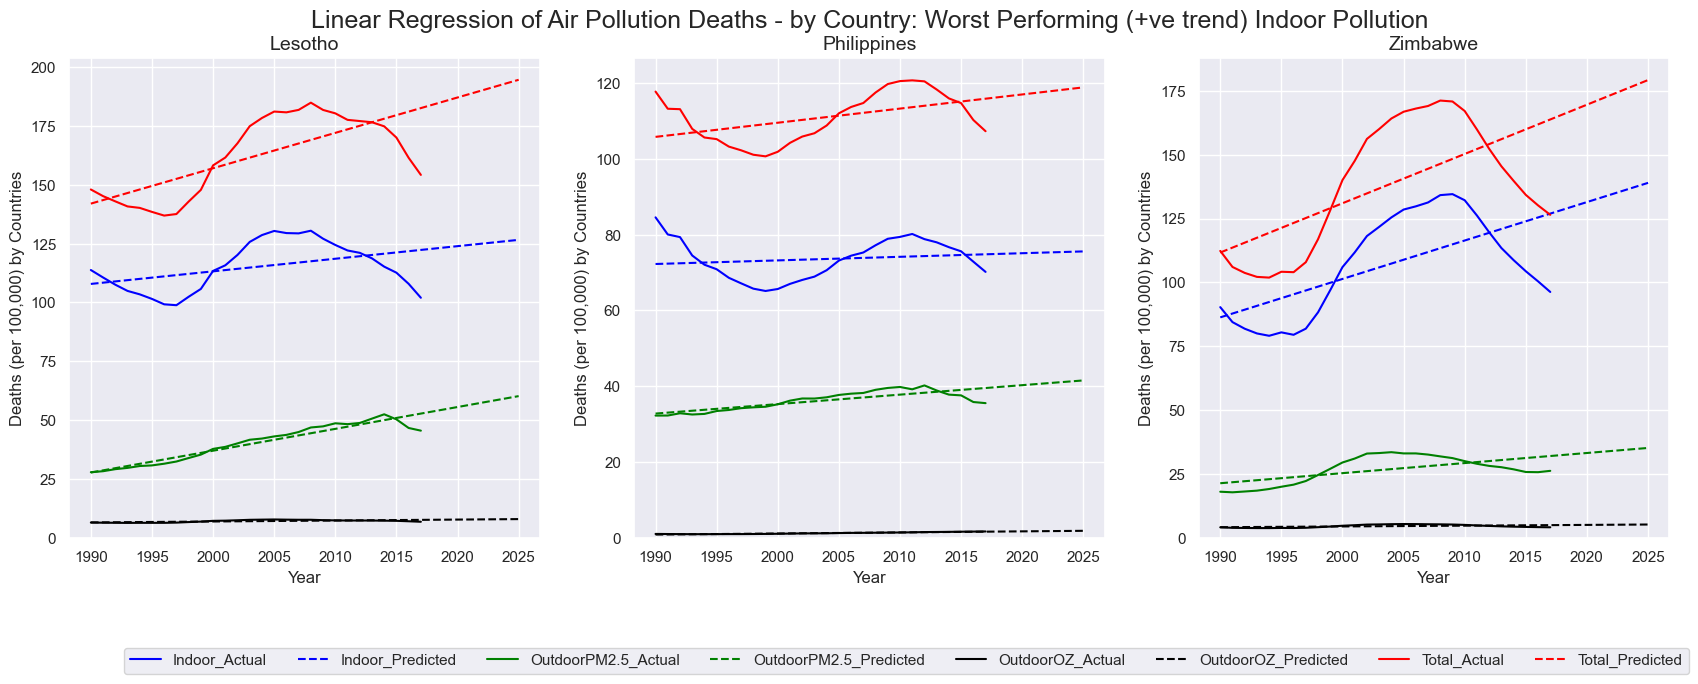

In [211]:
# Plot Linear Models
entities = list(plotgroup.index)
fid="LR_WorstCountries_Indoor.png"
title_add="- by Country: Worst Performing (+ve trend) Indoor Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,
                legend_adjust,forecast_len=len(X_forecast),figheight=6)

Notice that the Philippines Zimbabwe and Lesotho have positive slopes, representing an upward trend in indoor pollution deaths per 100,000, while others in the plot group are relatively flat. This assumes a linear trend from 1990-2017, which is not entirely valid. If a cubic model is used, there is a decline in predicted deaths for all time series of the 3 countries.

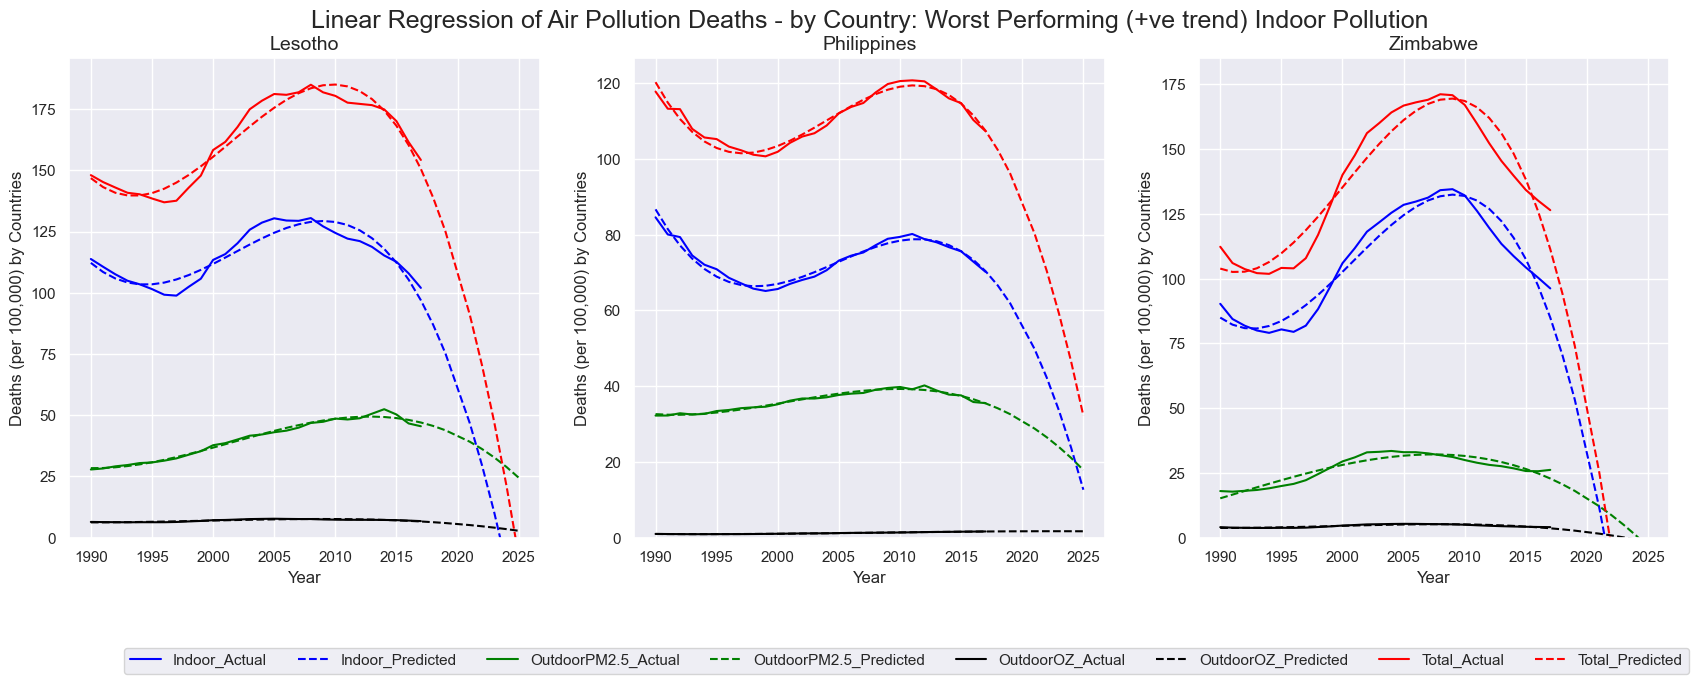

In [212]:
# Plot Polynomial Models
entities = list(plotgroup.index)
fid="LR_WorstCountries_Indoor.png"
title_add="- by Country: Worst Performing (+ve trend) Indoor Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,poly_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,
                legend_adjust,forecast_len=len(X_forecast),figheight=6)

#### 4.5.2 Countries with Increasing Outdoor PM2.5 Pollution Deaths Trend

In [213]:
# Determine which countries have increasing pollution deaths per 100,000 with a positive slope & worst model fit
# Outdoor PM2.5 Pollution
plotgroup = LR_parameters[grouplabel][(LR_parameters[grouplabel]['OutdoorPM2.5_Slopes']>0)]
#sort the worst performers
plotgroup=plotgroup.sort_values(['OutdoorPM2.5_Slopes','OutdoorPM2.5_Scores'],ascending=[False, True])
plotgroup

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Uzbekistan,-1.169,2386.048,0.91,1.348,-2627.658,0.80,-0.115,233.084,0.80
Pakistan,-2.008,4109.875,0.94,0.994,-1940.039,0.96,-0.011,31.993,0.16
Swaziland,-1.843,3803.942,0.51,0.930,-1830.325,0.91,-0.039,84.490,0.25
Lesotho,0.535,-957.656,0.17,0.929,-1820.240,0.92,0.041,-74.235,0.42
Yemen,-4.455,9012.922,0.99,0.823,-1604.312,0.93,-0.002,7.662,0.07
...,...,...,...,...,...,...,...,...,...
Tajikistan,-1.947,3962.739,0.94,0.043,-34.633,0.01,-0.104,211.458,0.91
Burkina Faso,-1.773,3690.386,0.97,0.042,-65.956,0.08,-0.001,3.064,0.01
Ecuador,-0.673,1358.873,0.87,0.040,-52.318,0.02,-0.009,18.679,0.87


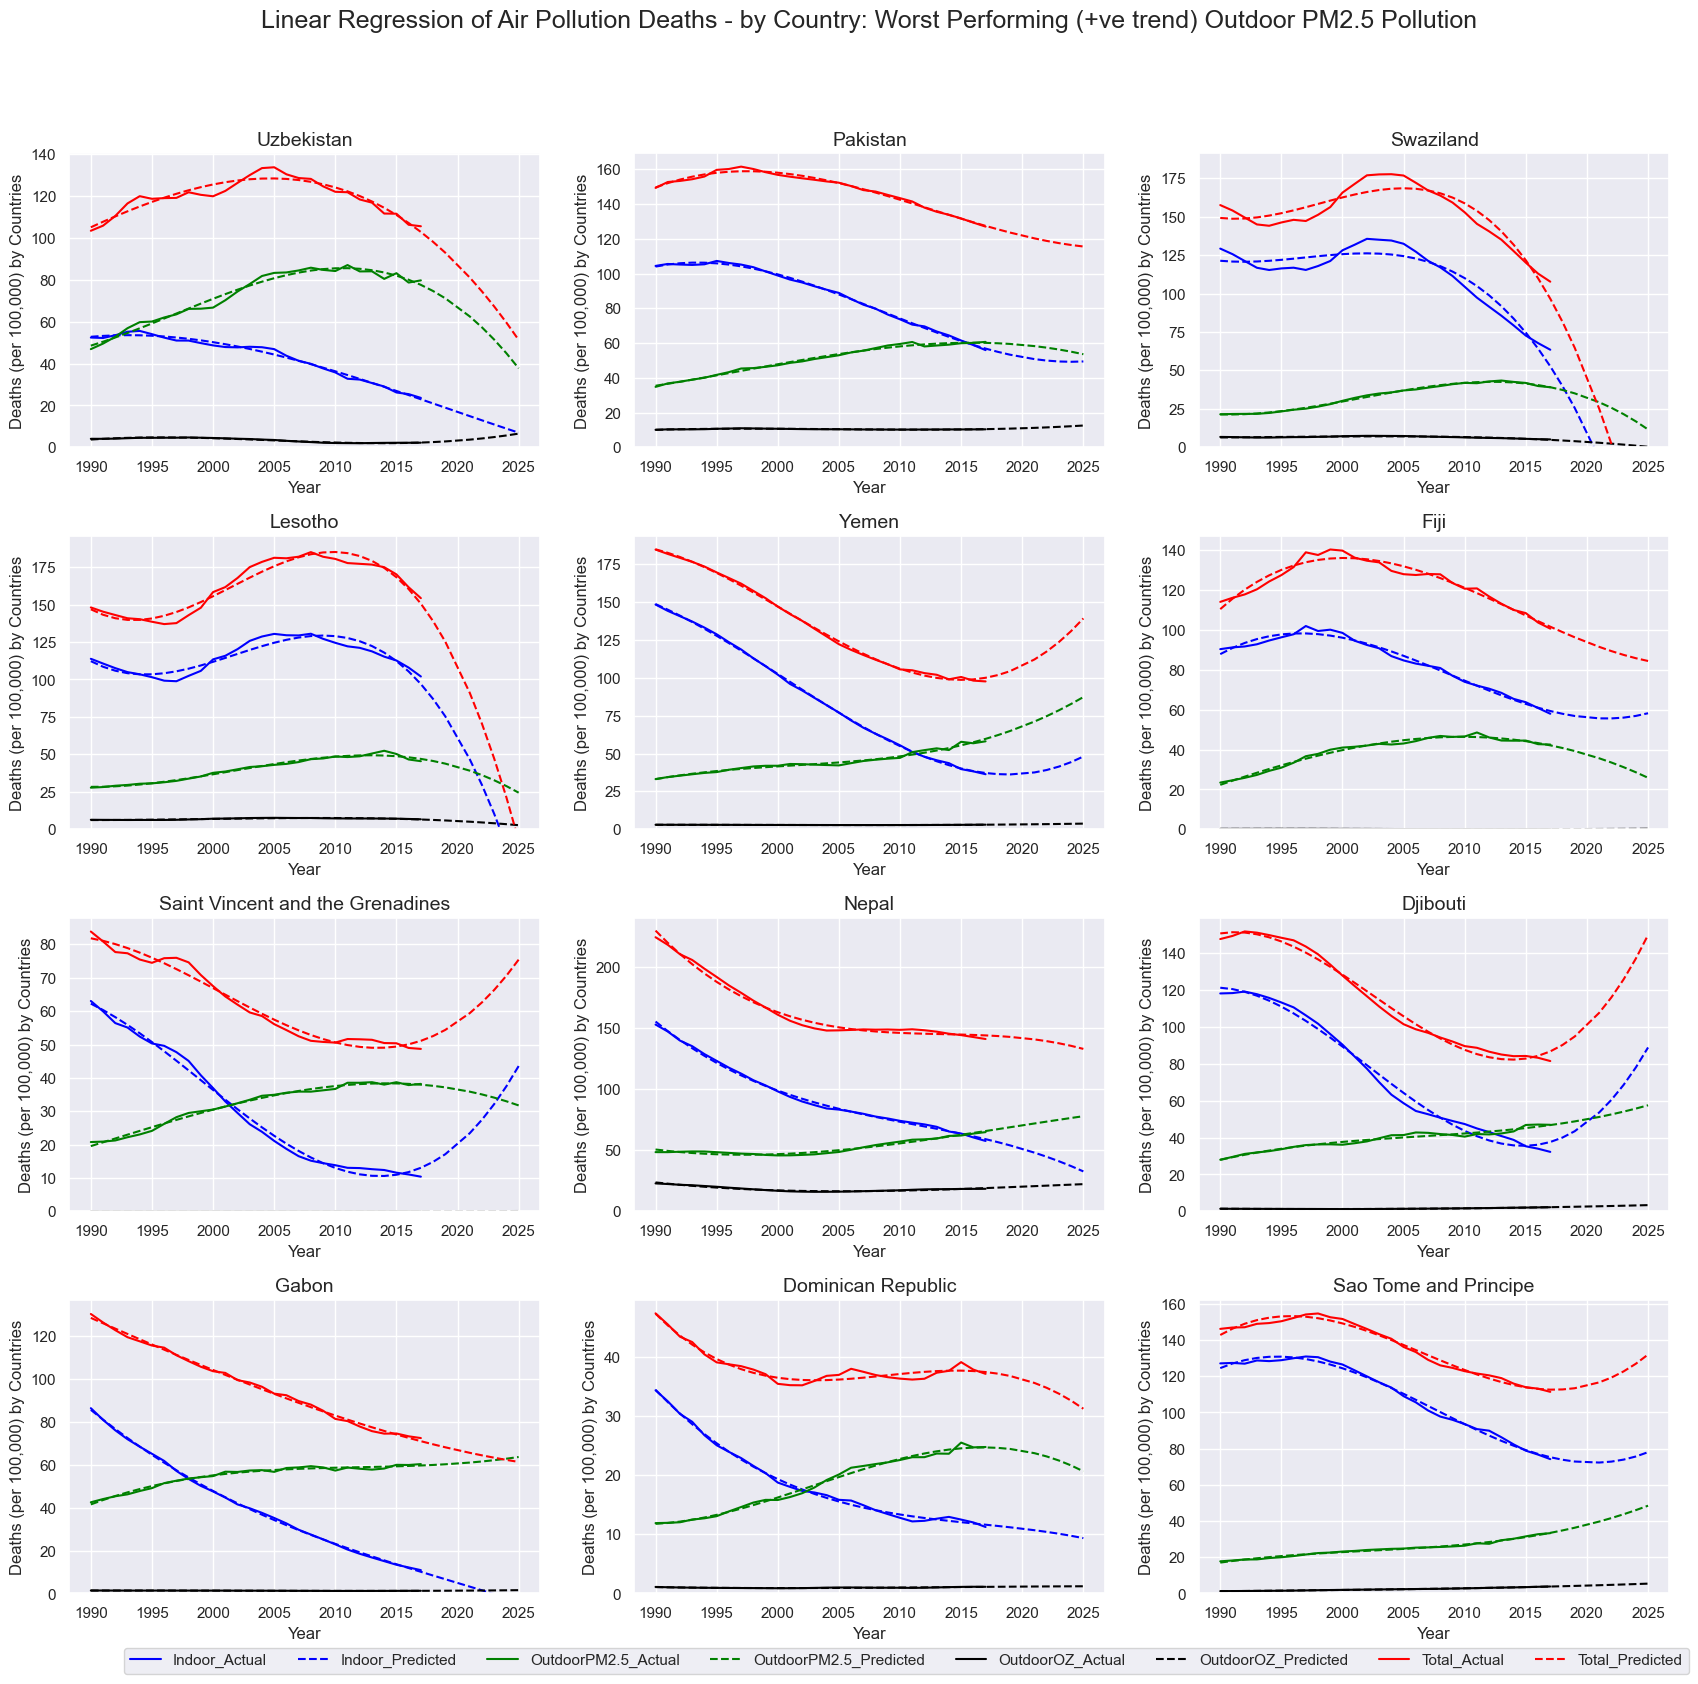

In [218]:
# Plot the group
entities = list(plotgroup.iloc[0:12,:].index) #top 9 worst performers
fid="LR_WorstCountries_OutdoorPM2.5.png"
title_add="- by Country: Worst Performing (+ve trend) Outdoor PM2.5 Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,poly_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,
                legend_adjust,forecast_len=len(X_forecast),figheight=18)

#### 4.5.5 Countries with Most Linear Fit

In [137]:
# Determine which regions have the BEST LINEAR regression model performance among all indicators
plotgroup = LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']>0.90) &
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']>0.90) &
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']>0.90)]
plotgroup

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Algeria,-0.128,257.786,0.96,-0.747,1546.638,0.99,-0.012,26.345,0.92
Bahrain,-0.086,173.136,0.96,-3.245,6599.619,0.96,-0.326,661.489,0.92
Barbados,-0.011,21.906,0.92,-0.675,1396.952,0.95,0.002,-4.763,0.91
Burundi,-3.788,7753.170,0.98,-0.445,918.103,0.93,-0.067,137.943,0.96
Greenland,-0.102,206.060,0.96,-1.197,2443.283,1.00,-0.085,175.620,0.99
Luxembourg,-0.031,61.944,0.94,-0.726,1476.819,1.00,-0.043,89.933,0.93
Malta,-0.066,132.369,0.92,-0.745,1522.524,0.99,-0.035,73.048,0.94
Sao Tome and Principe,-2.262,4640.903,0.91,0.519,-1014.687,0.96,0.092,-182.769,0.98
Slovenia,-0.398,802.720,0.94,-0.856,1741.773,0.96,-0.096,194.215,0.94


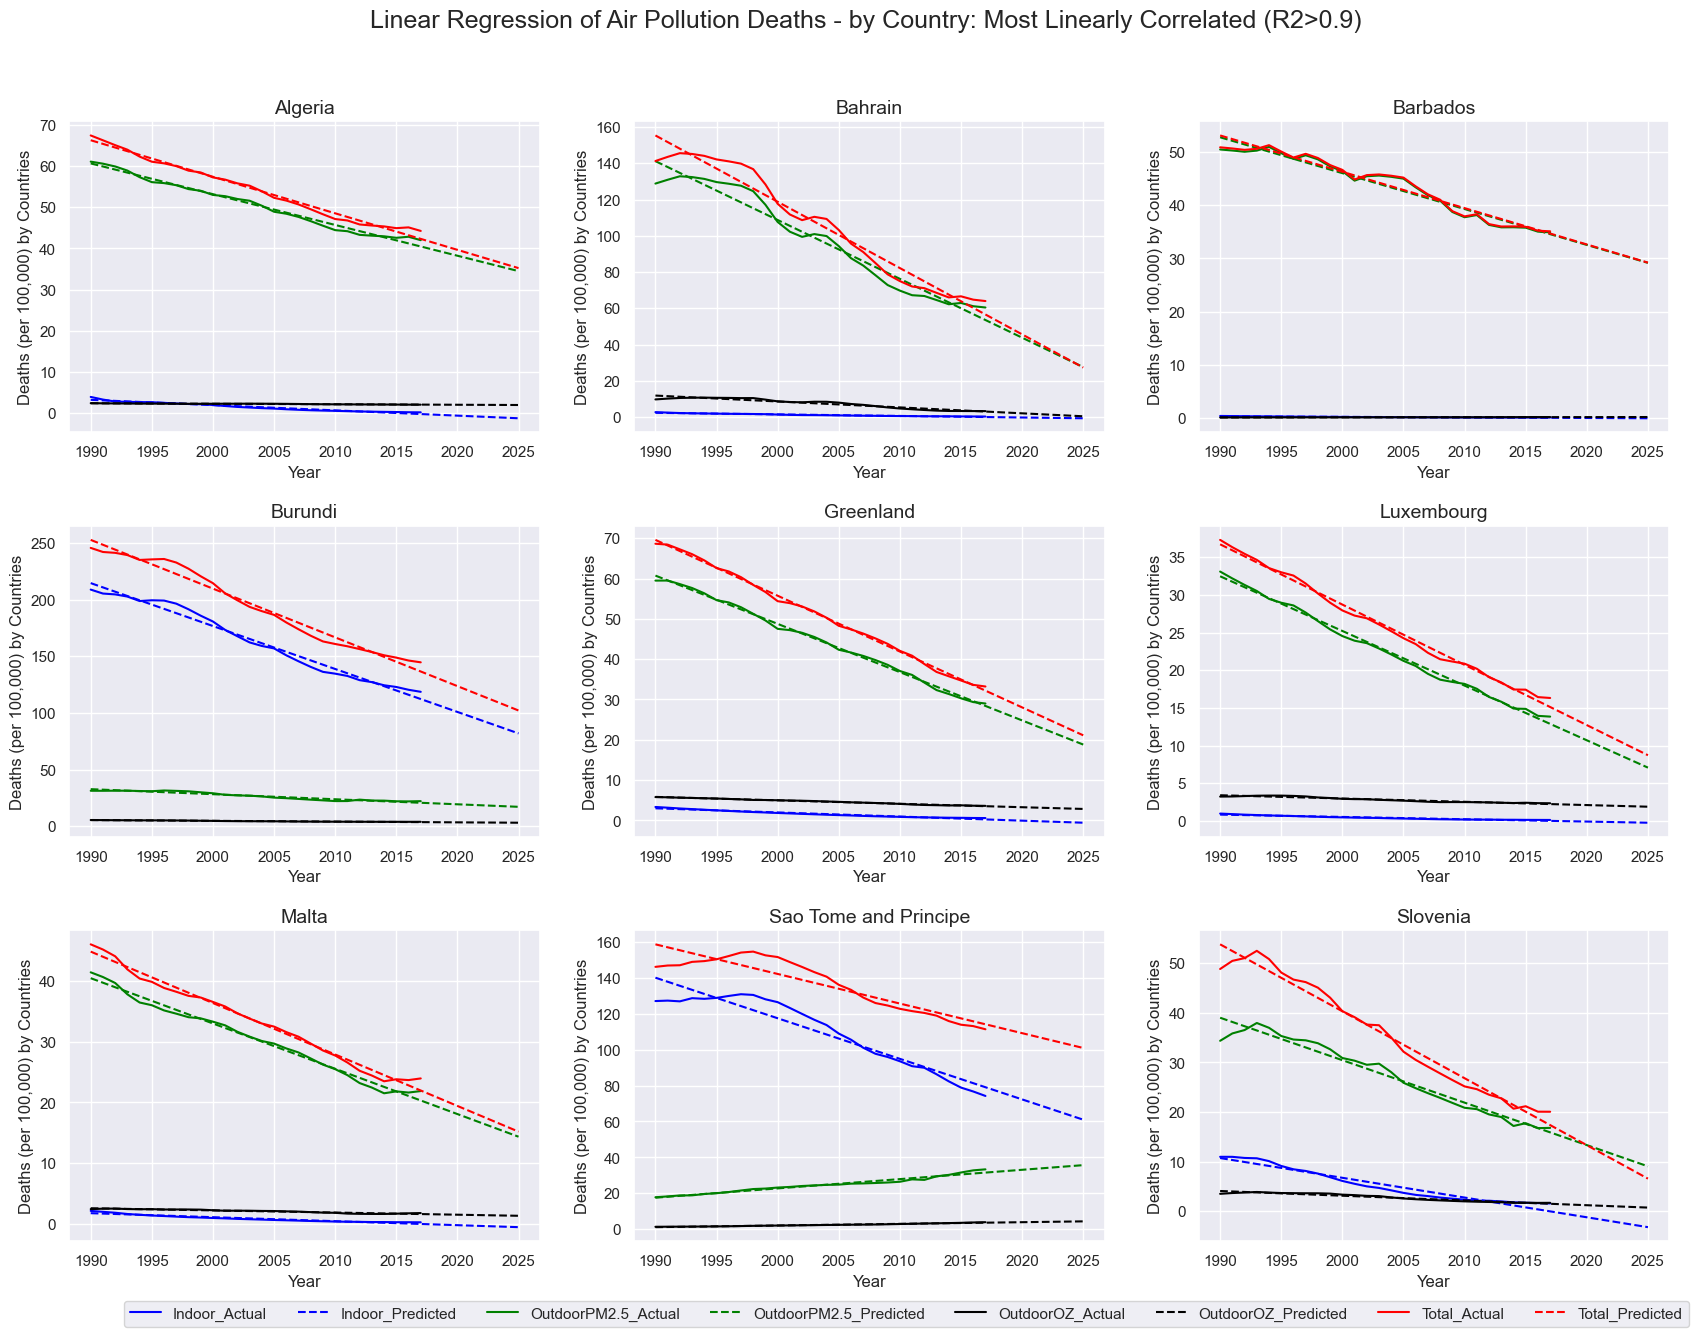

In [139]:
# Plot the group
entities = list(plotgroup.index)
fid="LR_MostLinear.png"
title_add="- by Country: Most Linearly Correlated (R2>0.9) "
legend_adjust=+0.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust,
                forecast_len=len(X_forecast))

#### 4.5.6 Countries with Worst Linear Fit - Polynomial Alternative

In [227]:
# Determine which regions have the poorest regression model performance among all indicators
plotgroup = LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']<0.1) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.1) |
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.1)]
plotgroup

,Indoor_Slopes,Indoor_Intercepts,Indoor_Scores,OutdoorPM2.5_Slopes,OutdoorPM2.5_Intercepts,OutdoorPM2.5_Scores,OutdoorOZ_Slopes,OutdoorOZ_Intercepts,OutdoorOZ_Scores
Entity,,,,,,,,,
Armenia,-1.820,3679.228,0.98,-0.031,115.888,0.01,-0.101,208.058,0.90
Azerbaijan,-1.665,3377.552,0.91,0.123,-185.501,0.07,-0.065,134.355,0.60
Belize,-1.242,2513.423,0.97,0.141,-249.274,0.07,0.007,-13.327,0.13
Benin,-2.152,4434.224,0.99,-0.010,39.481,0.00,-0.017,35.989,0.35
Burkina Faso,-1.773,3690.386,0.97,0.042,-65.956,0.08,-0.001,3.064,0.01
...,...,...,...,...,...,...,...,...,...
Suriname,-0.797,1617.627,0.97,-0.001,39.487,0.00,0.010,-18.762,0.89
Tajikistan,-1.947,3962.739,0.94,0.043,-34.633,0.01,-0.104,211.458,0.91
Tanzania,-2.420,4955.877,0.98,-0.042,100.612,0.34,-0.001,3.390,0.02


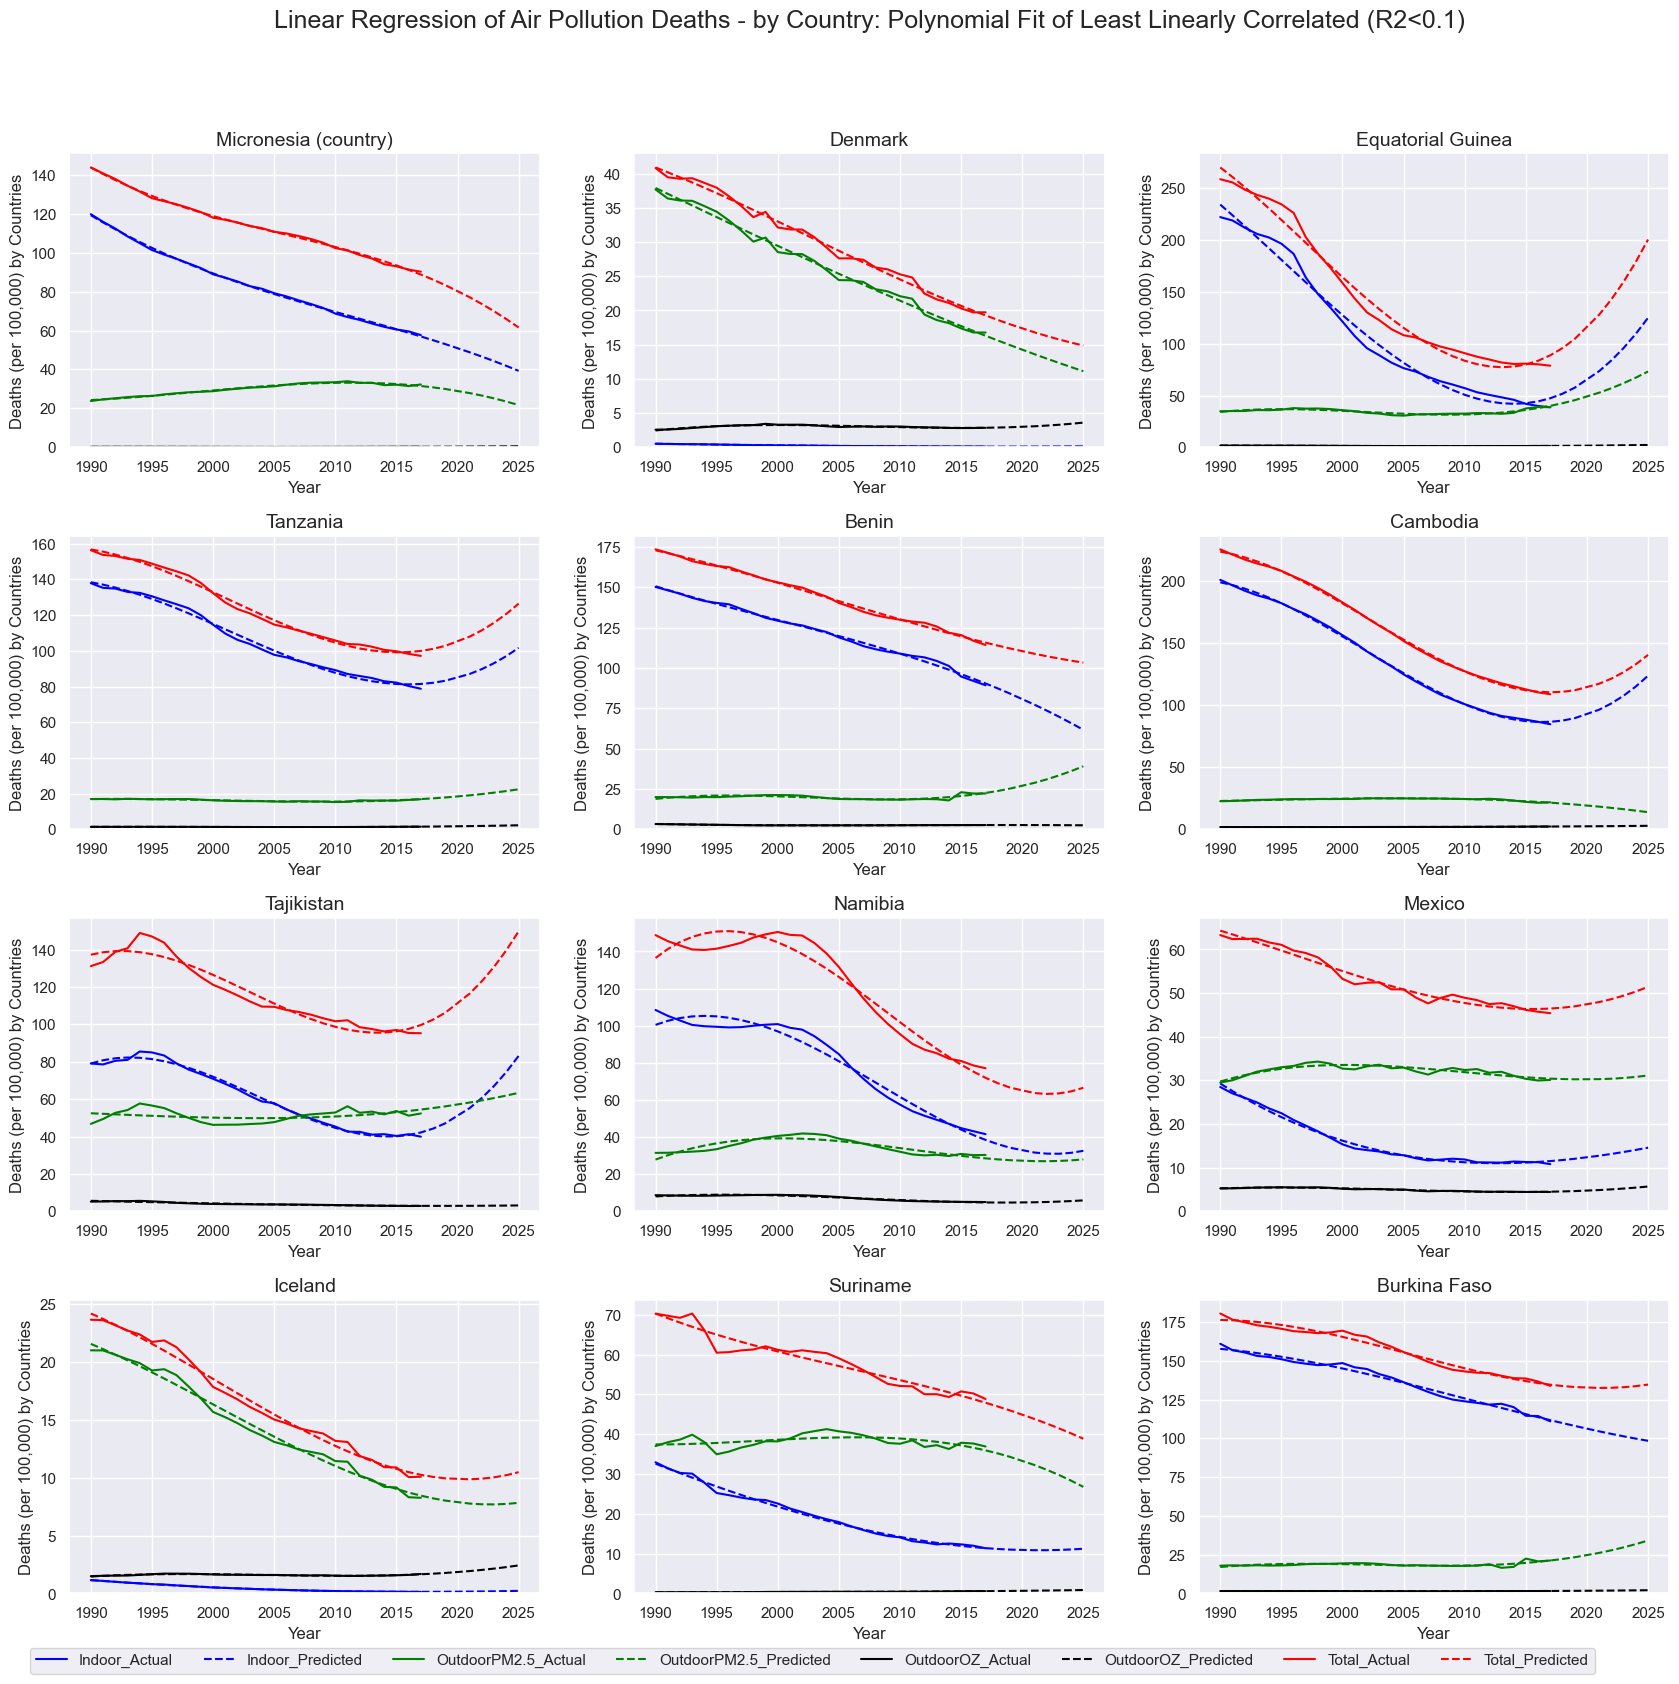

In [233]:
# Plot the group
# Sample 12 countries in the group
entities = random.sample(list(plotgroup.index),12)
fid="LR_LeastLinear.png"
title_add="- by Country: Polynomial Fit of Least Linearly Correlated (R2<0.1)"
legend_adjust=0
plot_LR_multiple(grouplabel,poly_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust,
                forecast_len=len(X_forecast),figheight=18)

The sampled list with countries having the least linear time series appear to be more appropriately modelled withcubic functions. After 1-3 periods of forecasting, some models appear to increase significantly when linear trends would point to the series pleateauing or declining instead.

### 4.6 Discussion

Ultimately the linear/polynomial regression models are valuable at predicting the general trend in deaths due over time and be used to predict future deaths, where past data appears to be highly linear. It has severe limitations for many countries. Caution would need to e exercised forecasting far beyond 1-3 periods. To explore the interaction with other features, we proceed to merge different datasets between death due to environmental factors and socio-demographic/economic factors. We then examine them in 3 tree-based machine learning models.